# <A1_퍼포먼스_팩토리_마케팅_광고_최적화>

## [배경] 


## [주제]
광고 마케팅 최적화 알고리즘 모델링

## [설명]




# [데이셋 정보]

### 1. bidding_result_adding.csv [파일] 


### 2. log_csv.csv [파일]


### 3. 결론



데이터를 확인한 결과는 다음과 같습니다.

index = 48896

Impression = 2734

Click = 189

Cost = 2406

Sum of AD rank = 99529

Bid = 286

Price(PC) = 7516

Price(Mobile) = 7516

Delivery Fee = 116

Category Name 1 = 10

Category Name 2 = 126

Category Name 3 = 545

Category Name 4 = 734

date = 57 [2022.10.31~2023.01.03]


       

# bdding 데이터 
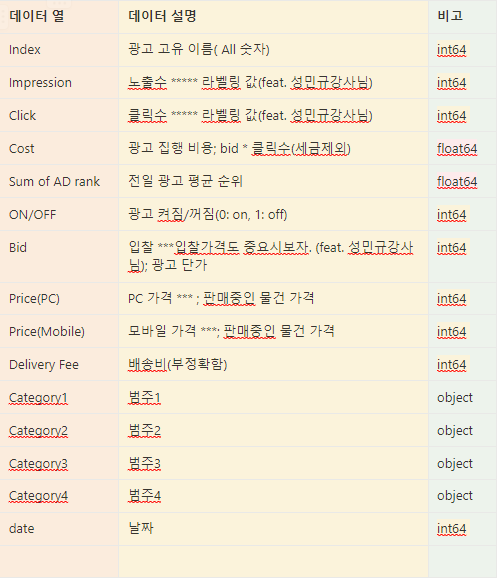


# log 데이터

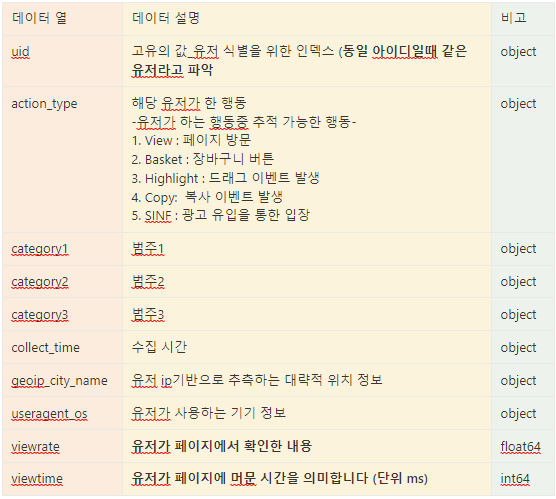

# 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인

Advertiser : 광고주
광고의 주체로서 광고비용을 부담하는 조직체 또는 개인을 말함.

Advertising : 광고
확인 가능한 광고주가 다양한 매체를 통해, 제품이나 서비스 또는 아이디어에 관해 통상적으로 유료이며 대개는 설득적인 정보의 비대인적인 커뮤니케이션활동을 말함.

광고주 [advertiser]란 광고활동 하는 주체자를 말하는 것으로, 광고활동에는 광고대행사와 매체가 관련되기 때문에 이들과 구별하는 뜻에서 광고주라고 합니다.

대체로 광고주는 광고 계획안의 기본을 작성한 뒤 표현 ·매체 ·제작 등과 관련되는 일체의 일을 광고대행사에 맡기게 됩니다.

광고대행사 쪽에서 보면 광고주는 고객이므로 클라이언트(client)라고 합니다. 광고주를 스폰서라고 표현하기도 하지만, 이 표현은 대개 전파매체 광고주인 경우에 쓰이는 말입니다.


<입찰=bid>




In [ ]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures



# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# A1 퍼포먼스 팩토리 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/A1_퍼포먼스 팩토리 with 김재승/"

bidding = pd.read_csv(base_path + "bidding_results_adding.csv", encoding="utf-8" )
log = pd.read_csv(base_path + "log_csv.csv",  encoding="utf-8")


# 2. EDA 


# 데이터 살펴보기 기술통계

In [ ]:
bidding.head(10)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031
6,4158472,138,2,270.0,4.420290,240,129000,129000,0,가구/인테리어,아동/주니어가구,책장,NaN,20221031
7,4159062,60,1,50.0,10.366667,50,699000,699000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
8,4159064,8,0,0.0,9.625000,50,169000,169000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
9,4159066,76,3,640.0,5.421053,250,149000,149000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031


In [ ]:
bidding.tail(10)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
1337078,2566230,85,2,860.0,1.611765,500,36800,36800,0,생활/건강,욕실용품,수건/타월,세면타월,20230103
1337079,2566332,16,1,260.0,1.937500,500,17900,17900,0,생활/건강,청소용품,휴지통,다용도휴지통,20230103
1337080,2566781,10,0,0.0,2.000000,500,7800,7800,3000,생활/건강,문구/사무용품,카드/엽서/봉투,엽서,20230103
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,생활/건강,문구/사무용품,다이어리/플래너,다이어리,20230103
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103
1337087,2566923,14,0,0.0,12.428571,500,128800,128800,0,가구/인테리어,인테리어소품,액자,퍼즐/그림/사진액자,20230103


In [ ]:
bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337088 entries, 0 to 1337087
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1337088 non-null  int64  
 1   Impression       1337088 non-null  int64  
 2   Click            1337088 non-null  int64  
 3   Cost             1337088 non-null  float64
 4   Sum of AD rank   1337078 non-null  float64
 5   Bid              1337088 non-null  int64  
 6   Price(PC)        1337088 non-null  int64  
 7   Price(Mobile)    1337088 non-null  int64  
 8   Delivery Fee     1337088 non-null  int64  
 9   Category Name 1  1337088 non-null  object 
 10  Category Name 2  1337088 non-null  object 
 11  Category Name 3  1331221 non-null  object 
 12  Category Name 4  930132 non-null   object 
 13  date             1337088 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 142.8+ MB


In [ ]:
log.head(10)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
6,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,NaN,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
7,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,2022-12-29 15:32:12,Gangnam-gu,Windows,100.0,8483
8,8,d8SbF2KNyXIAClrS,View,실내운동,유산소,스텝퍼,2022-12-29 16:15:35,NaN,Windows,100.0,2944
9,9,tuFJqmMTmj0AAIxD,View,가구,침대,침대프레임,2022-12-29 10:44:35,Osan,Android,100.0,1215


In [ ]:
log.tail(10)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
5659531,5659531,fG9bBGOiwtgAAuZu,Highlight,조명,형광등·조명부속품,전구·형광등,2022-12-28 15:20:28,Cheonan,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659535,5659535,0//H1mOs/wgABiw0,View,수납·정리,행거,NaN,2022-12-29 13:14:04,Seoul,Windows,100.0,2006
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030
5659540,5659540,bgy5ZGOszc4ADrmd,View,가구,화장대·콘솔,일반화장대,2022-12-29 08:14:39,Iksan,iOS,0.0,0


In [ ]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [ ]:
bidding.isnull().sum(axis=0)

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [ ]:
log.isnull().sum(axis=0)

Unnamed: 0              0
uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
# bidding.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
# 결측치 알려주는 코드다.으캬캬캬
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values = missing_values_table(log)
missing_values.head(20)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
bidding

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date,CTR,CPC,CPM
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031,0.000000,NaN,0.00
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031,0.000000,NaN,0.00
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031,0.000000,NaN,0.00
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031,0.000000,NaN,0.00
10,4159623,9,0,0.0,1.000000,50,559000,559000,-1,가구/인테리어,침실가구,침대,침대프레임,20221031,0.000000,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,생활/건강,문구/사무용품,다이어리/플래너,다이어리,20230103,0.000000,NaN,0.00
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103,2.521008,330.0,0.99
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103,0.000000,NaN,0.00
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103,0.000000,NaN,0.00


In [ ]:
bidding.shape

(1337088, 14)

In [ ]:
log.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
log.shape

(5659541, 10)

In [ ]:
bidding.describe().T

# 클릭수를 제외하고 모두 편차가 심하다.

,count,mean,std,min,25%,50%,75%,max
index,1337088.0,5.167098e+06,2.655813e+06,25786.0,3.300168e+06,4.637081e+06,7.290770e+06,9984108.0
Impression,1337088.0,4.412753e+01,3.434510e+02,0.0,3.000000e+00,1.000000e+01,3.100000e+01,78607.0
Click,1337088.0,7.189467e-01,3.423456e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,474.0
Cost,1337088.0,1.800053e+02,1.772706e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,325300.0
Sum of AD rank,1337078.0,1.138271e+01,1.323231e+01,1.0,3.706897e+00,7.090909e+00,1.341026e+01,100.0
Bid,1337088.0,2.631728e+02,2.769174e+02,50.0,5.000000e+01,2.000000e+02,3.500000e+02,4000.0
Price(PC),1337088.0,1.826830e+05,4.544135e+05,2000.0,1.980000e+04,5.900000e+04,1.790000e+05,15000000.0
Price(Mobile),1337088.0,1.826830e+05,4.544135e+05,2000.0,1.980000e+04,5.900000e+04,1.790000e+05,15000000.0
Delivery Fee,1337088.0,2.005842e+03,5.423991e+03,-1.0,0.000000e+00,0.000000e+00,3.000000e+03,145000.0
date,1337088.0,2.022173e+07,2.184658e+03,20221031.0,2.022112e+07,2.022120e+07,2.022122e+07,20230103.0


# 결측치 제거하기

In [ ]:
# 제거한 이유는 평균값이나 대체값으로 하기에는 기준을 세우기가 애매해서 다 지우고 하는것이 낫다고 판단 애매하게 대체값으로 하면 데이터 결과값에 왜곡되기 쉽다. *********************(강사님)
bidding = bidding.dropna()

In [ ]:
# 제거한 이유는 평균값이나 대체값으로 하기에는 기준을 세우기가 애매해서 다 지우고 하는것이 낫다고 판단 애매하게 대체값으로 하면 데이터 결과값에 왜곡되기 쉽다.********************(강사님)
log = log.dropna()

# 이상치 데이터 보기 bidding

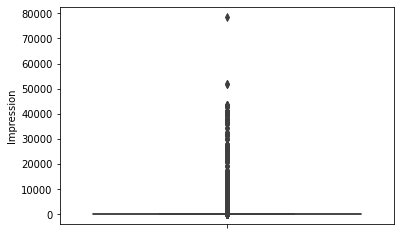

In [ ]:
sns.boxplot(data=bidding, y="Impression")

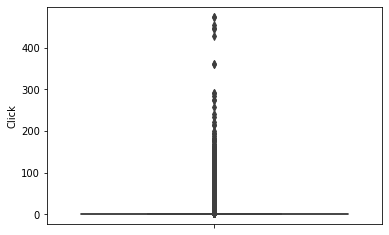

In [ ]:
sns.boxplot(data=bidding, y="Click")

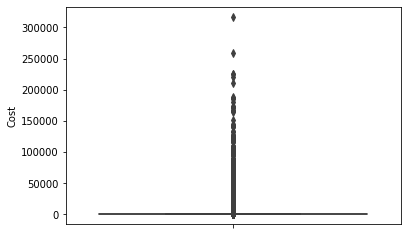

In [ ]:
sns.boxplot(data=bidding, y="Cost")

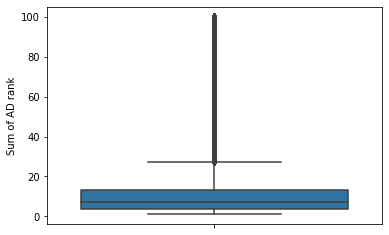

In [ ]:
sns.boxplot(data=bidding, y="Sum of AD rank")

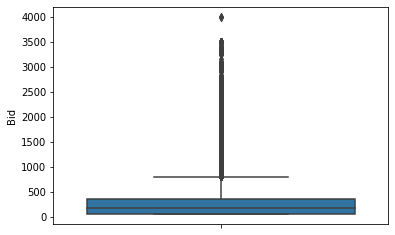

In [ ]:
sns.boxplot(data=bidding, y="Bid")

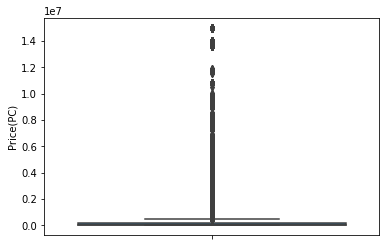

In [ ]:

sns.boxplot(data=bidding, y="Price(PC)")

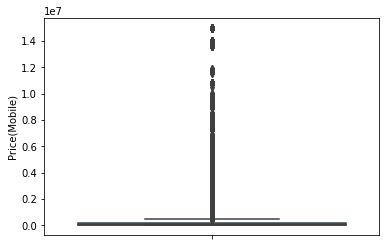

In [ ]:
sns.boxplot(data=bidding, y="Price(Mobile)")

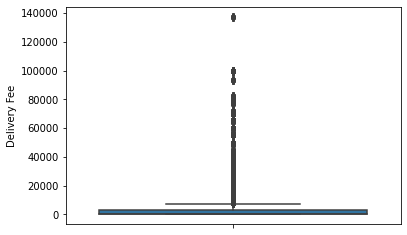

In [ ]:

sns.boxplot(data=bidding, y="Delivery Fee")

# log 데이터 이상치 

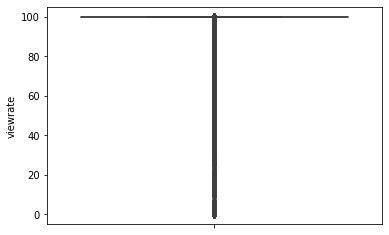

In [ ]:
sns.boxplot(data=log, y="viewrate")

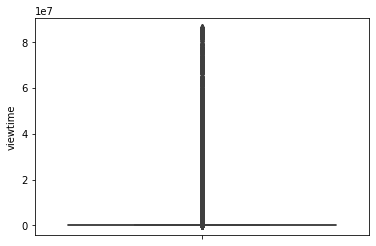

In [ ]:
sns.boxplot(data=log, y="viewtime")

# 데이터 종류 및 수 

In [ ]:
# nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다.

def number_data(a):
    column_names = a.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

    # type(column_names)

    print(column_names, "\n"); print(type(column_names))

    for i in column_names:
            print(f"{i} = {a[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다.



In [ ]:
number_data(bidding)

['index', 'Impression', 'Click', 'Cost', 'Sum of AD rank', 'Bid', 'Price(PC)', 'Price(Mobile)', 'Delivery Fee', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'date', 'CTR', 'CPC', 'CPM', 'CPI'] 

<class 'list'>
index = 33493
Impression = 2488
Click = 172
Cost = 2089
Sum of AD rank = 81454
Bid = 274
Price(PC) = 6455
Price(Mobile) = 6455
Delivery Fee = 105
Category Name 1 = 9
Category Name 2 = 58
Category Name 3 = 203
Category Name 4 = 734
date = 57
CTR = 8865
CPC = 6093
CPM = 2089
CPI = 31827


In [ ]:
number_data(log)

['uid', 'action_type', 'category1', 'category2', 'category3', 'collect_time', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime'] 

<class 'list'>
uid = 662670
action_type = 5
category1 = 2655
category2 = 548
category3 = 1683
collect_time = 680550
geoip_city_name = 2262
useragent_os = 12
viewrate = 1646
viewtime = 244539


In [ ]:
 # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수
def kinds_data(var):
    column_names = var.columns.values.tolist() 

    for i in column_names:
        print(f"{i} = {var[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

In [ ]:
kinds_data(log)

# 파생변수

In [ ]:
bidding["CTR"] = (bidding["Click"]/bidding["Impression"]) * 100
bidding["CPC"] = (bidding["Cost"]/bidding["Click"])
bidding["CPM"] = (bidding["Cost"]/1000)
bidding["CPI"] = (bidding["Cost"]/bidding["Impression"])

# 학습목표면 드랍시켜서 한다. *****

In [ ]:
log["RPT"] = (log["viewrate"]/log["viewtime"])

In [ ]:
# sns.pairplot(bidding)
# plt.show()

In [ ]:
# log에 통계치를 줘서 bidding에 갖다 붙친다. 예를 들면 카테고리를 분석을 해서 갖다 붙친다. 내가 고려하는 건 데이터의 행의 수도 안맞고, 중복 유저도 있다. 그리고 카테고리가 세분화되어 있어서 맞추기도 어렵다. 
# log에 viewrate랑 viewtime의 새로운 파생변수로 해서 유의미한 통계랑을 만들어 낸다. 
# 예를들면 로그에서 가전가구만 세서 viewrate의 새로운 평균을 넣는다 던지. 이렇게 로그의 데이터로 새로운 통계치 열을 만들어낸다. 

변수간의 상관관계

In [ ]:
# bidding.cov()
bidding.corr(method='pearson')

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,date,CTR,CPC,CPM
index,1.000000,-0.001893,-0.003031,-0.003754,-0.014654,0.013104,-0.100588,-0.100588,-0.000640,-0.010660,0.009017,-0.081329,-0.003754
Impression,-0.001893,1.000000,0.411630,0.368013,-0.057038,0.081982,0.008791,0.008791,-0.003171,-0.005185,-0.002644,0.110532,0.368013
Click,-0.003031,0.411630,1.000000,0.738737,-0.111125,0.090511,0.015979,0.015979,-0.009131,-0.005401,0.121462,0.099799,0.738737
Cost,-0.003754,0.368013,0.738737,1.000000,-0.053692,0.141317,0.007772,0.007772,-0.005802,-0.005663,0.040441,0.321240,1.000000
Sum of AD rank,-0.014654,-0.057038,-0.111125,-0.053692,1.000000,0.042989,-0.030730,-0.030730,0.011096,0.017619,-0.067095,0.136987,-0.053692
Bid,0.013104,0.081982,0.090511,0.141317,0.042989,1.000000,-0.041760,-0.041760,-0.000520,0.062180,-0.013132,0.559248,0.141317
Price(PC),-0.100588,0.008791,0.015979,0.007772,-0.030730,-0.041760,1.000000,1.000000,-0.029295,-0.017691,-0.012058,-0.007552,0.007772
Price(Mobile),-0.100588,0.008791,0.015979,0.007772,-0.030730,-0.041760,1.000000,1.000000,-0.029295,-0.017691,-0.012058,-0.007552,0.007772
Delivery Fee,-0.000640,-0.003171,-0.009131,-0.005802,0.011096,-0.000520,-0.029295,-0.029295,1.000000,0.005784,0.002013,-0.001677,-0.005802
date,-0.010660,-0.005185,-0.005401,-0.005663,0.017619,0.062180,-0.017691,-0.017691,0.005784,1.000000,-0.001949,-0.019420,-0.005663


In [ ]:
def corr_heatmap(var):

    mask = np.zeros_like(var.corr())
    mask[np.triu_indices_from(mask)] = True
    plt.rcParams["figure.figsize"] = (20,10)
    a = sns.heatmap(data = var.corr(), mask=mask, annot=True, fmt = '.3f', linewidths=0, cmap='Greens')
    
    return a

In [ ]:
# type(a)
sns.heatmap?

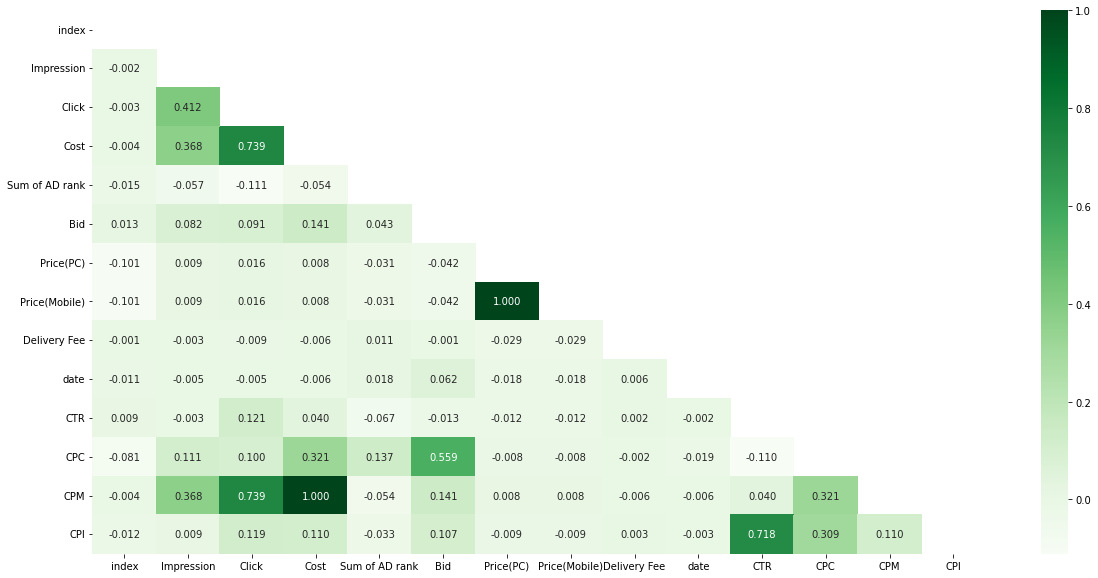

In [ ]:
corr_heatmap(bidding)

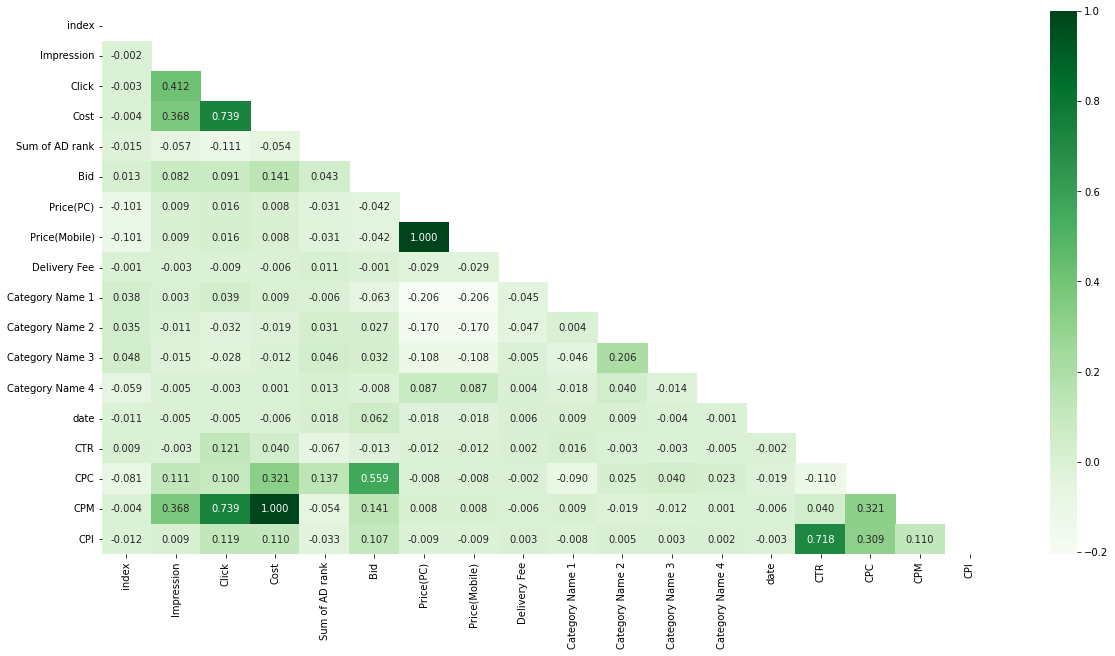

In [ ]:
corr_heatmap(bidding_copy)

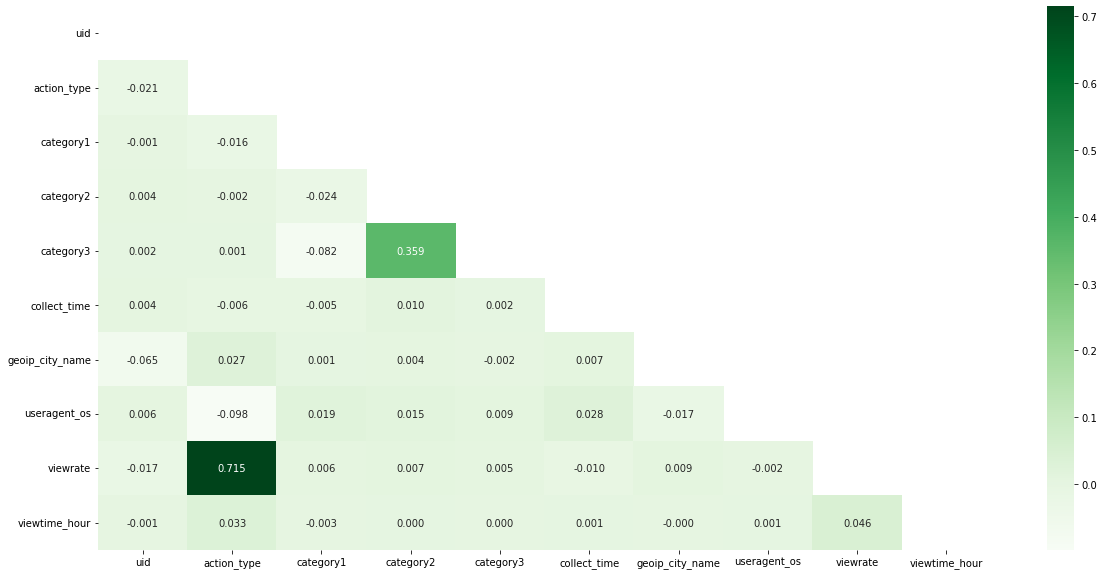

In [ ]:
corr_heatmap(log_copy)

제일 관련 있는 상관 관계 변수: click, cost, cpc, Bid, impression, cpm


Click
0      693228
1      128746
2       44264
3       20863
4       11730
        ...  
429         1
444         1
448         1
455         1
474         2
Length: 172, dtype: int64


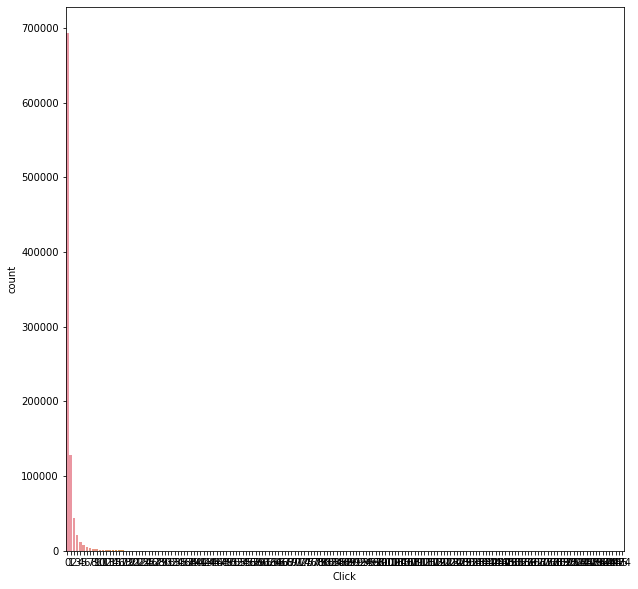

In [ ]:
# Click 데이터 살펴보기
print(bidding.groupby('Click').size())
plt.figure(figsize=(10,10))
sns.countplot(data=bidding.iloc[:,:], x='Click')
plt.show()


In [ ]:
print(bidding.groupby(['Click','Cost']).CPC.size())
plt.figure(figsize=(10,10))
sns.countplot(data=bidding, x='Click', hue='Cost')
plt.show()

In [ ]:
print(bidding.groupby(['Impression','Click']).CPC.size())
plt.figure(figsize=(10,10))
sns.countplot(data=bidding, x='Impression', hue='Cost')
plt.show()

Impression  Click
1           0        102672
            1          1510
            2             1
2           0         73534
            1          2474
                      ...  
43174       19            1
43585       16            2
43680       24            2
51982       28            2
78607       448           1
Name: CPC, Length: 14106, dtype: int64


Text(0.5, 1.0, 'Click')

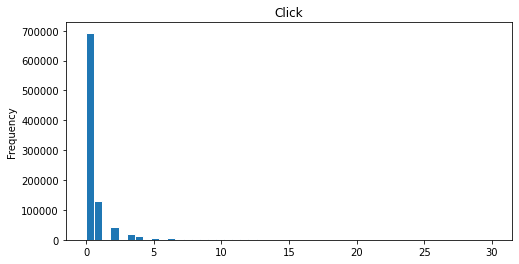

In [ ]:
bidding.Click.plot.hist(bins=50, figsize=(8,4), edgecolor='white',range=[0,30])
plt.title('Click')

# 두 변수 간 시각화

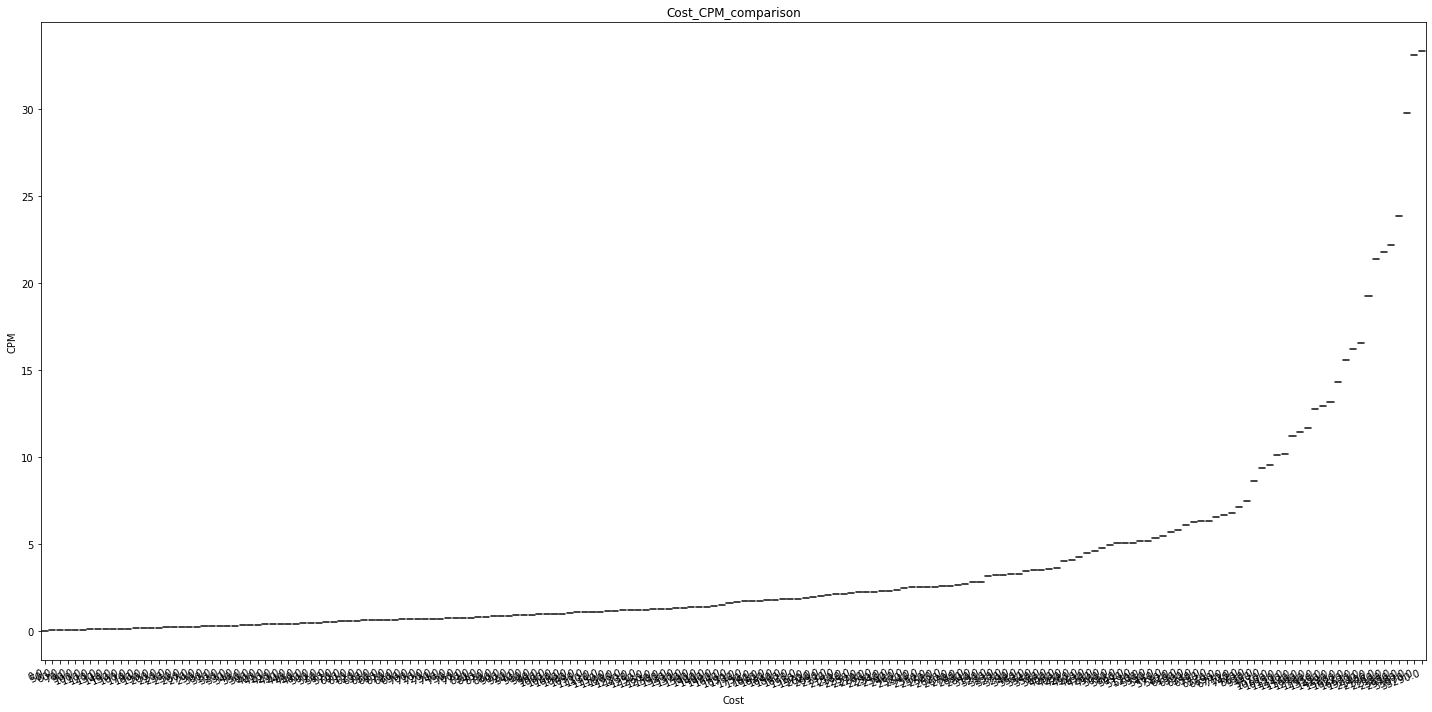

In [ ]:
ax = sns.boxplot(x="Cost", y="CPM", data=bidding.iloc[:1000,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_title('Cost_CPM_comparison')

plt.tight_layout()
plt.show()

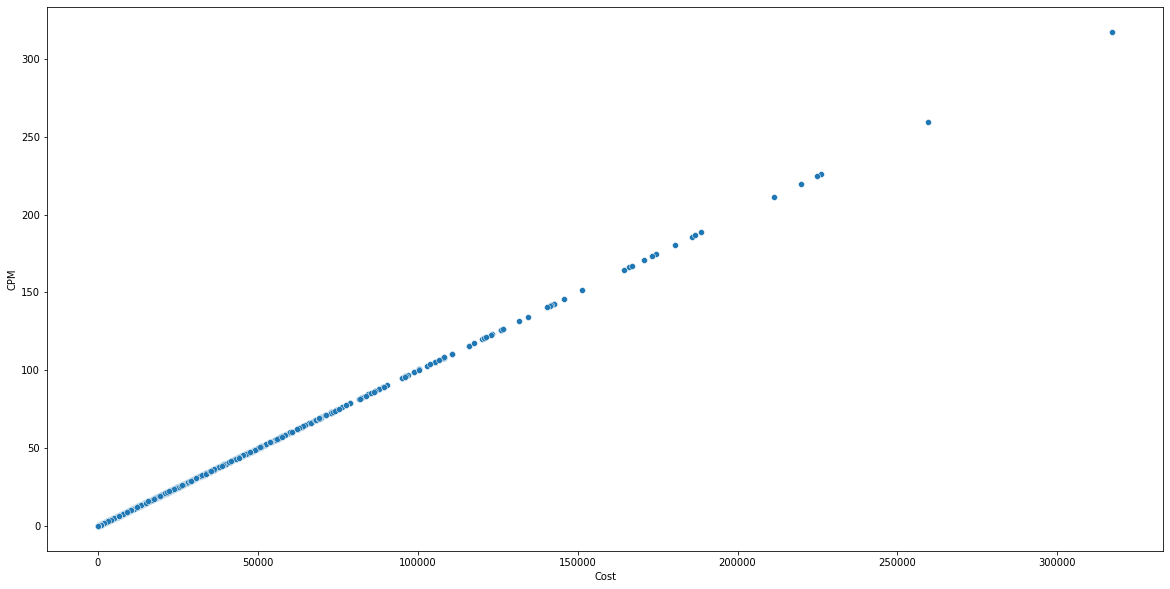

In [ ]:
sns.scatterplot(data=bidding_copy, x="Cost", y="CPM")

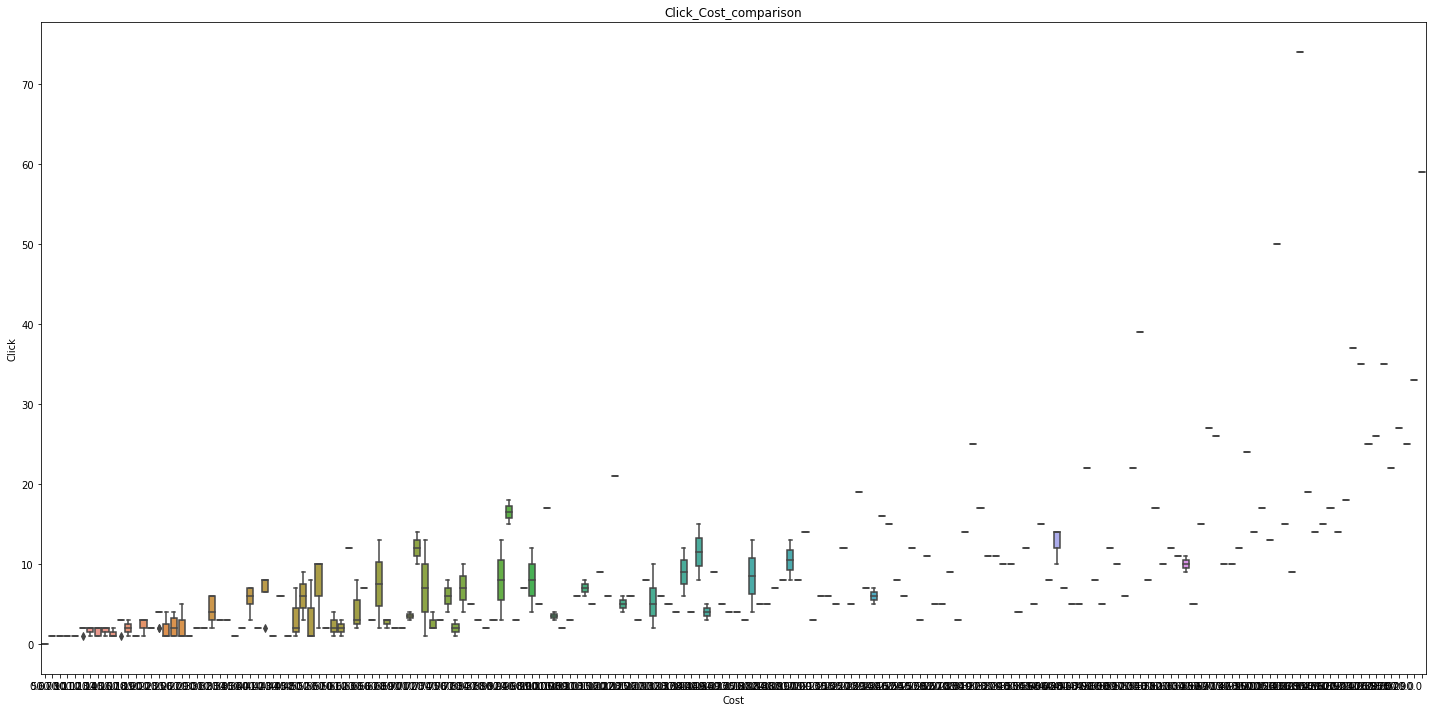

In [ ]:
ax = sns.boxplot(x="Cost", y="Click", data=bidding.iloc[:1000,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Click_Cost_comparison')

plt.tight_layout()
plt.show()

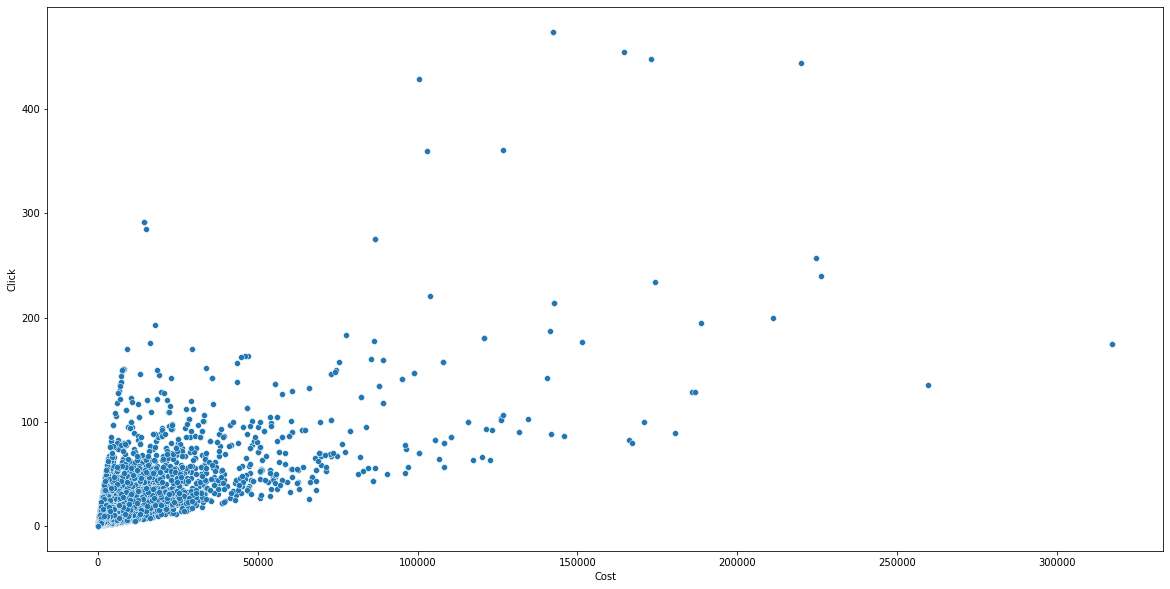

In [ ]:
sns.scatterplot(data=bidding_copy, x="Cost", y="Click")

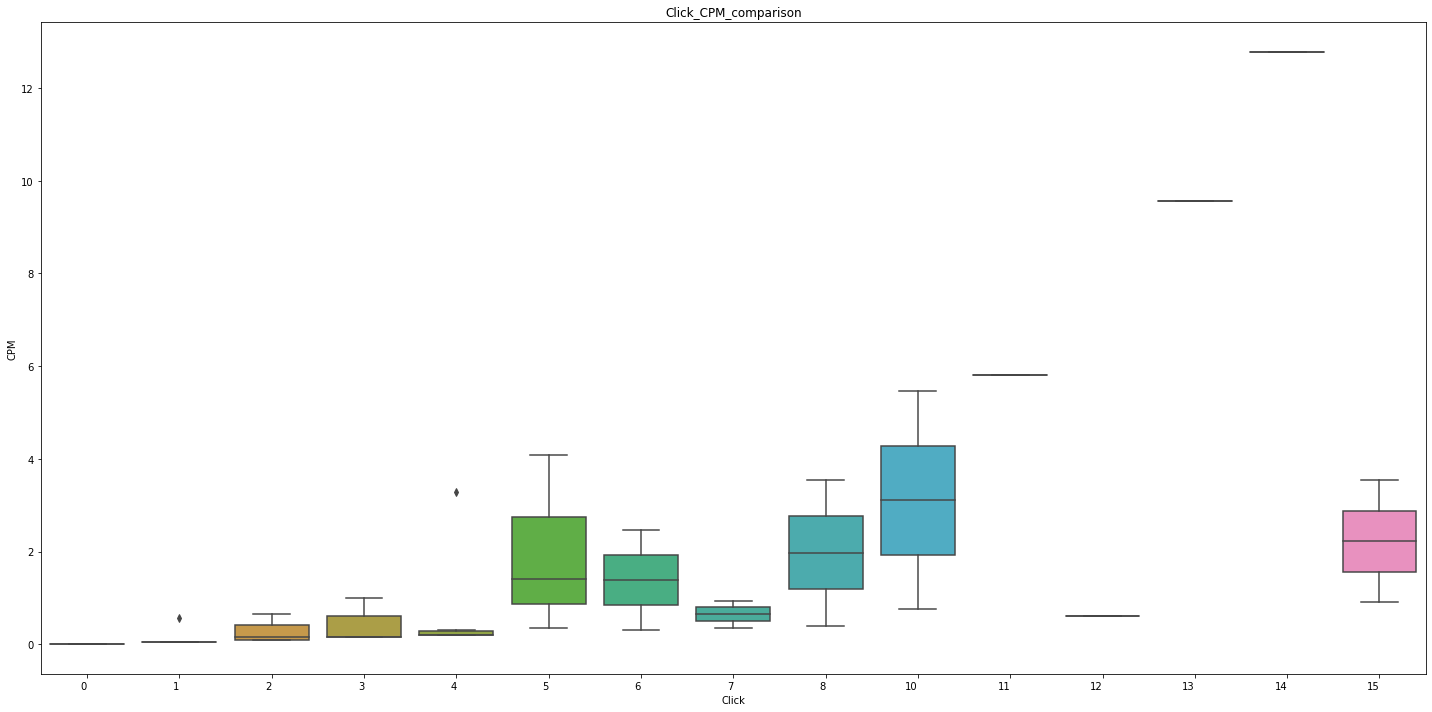

In [ ]:
ax = sns.boxplot(x="Click", y="CPM", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Click_CPM_comparison')

plt.tight_layout()
plt.show()

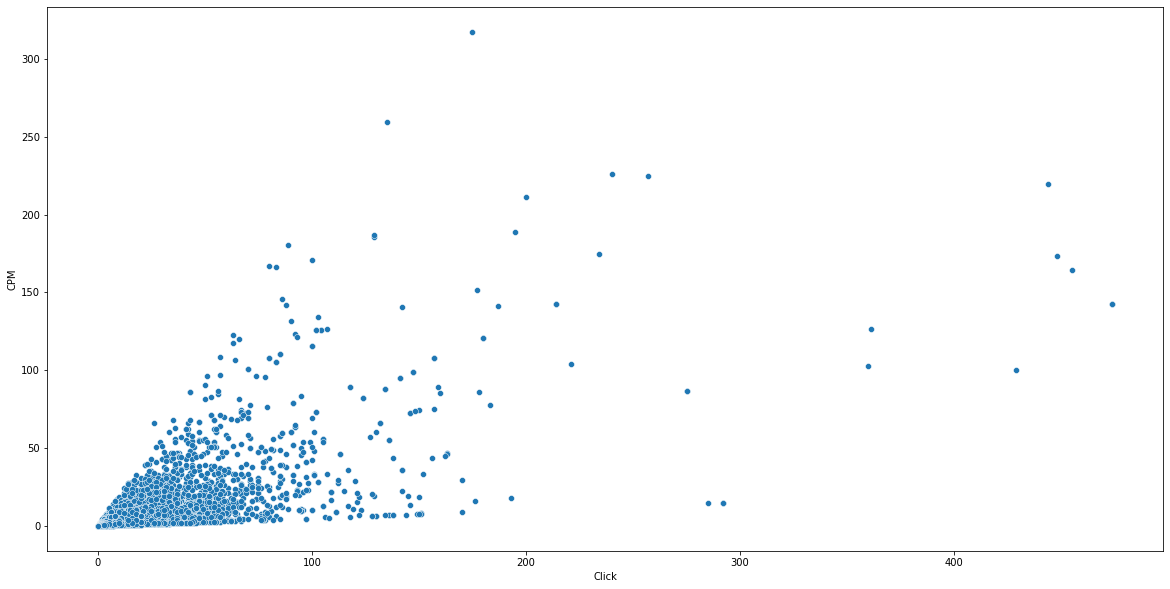

In [ ]:
sns.scatterplot(data=bidding_copy, x="Click", y="CPM")

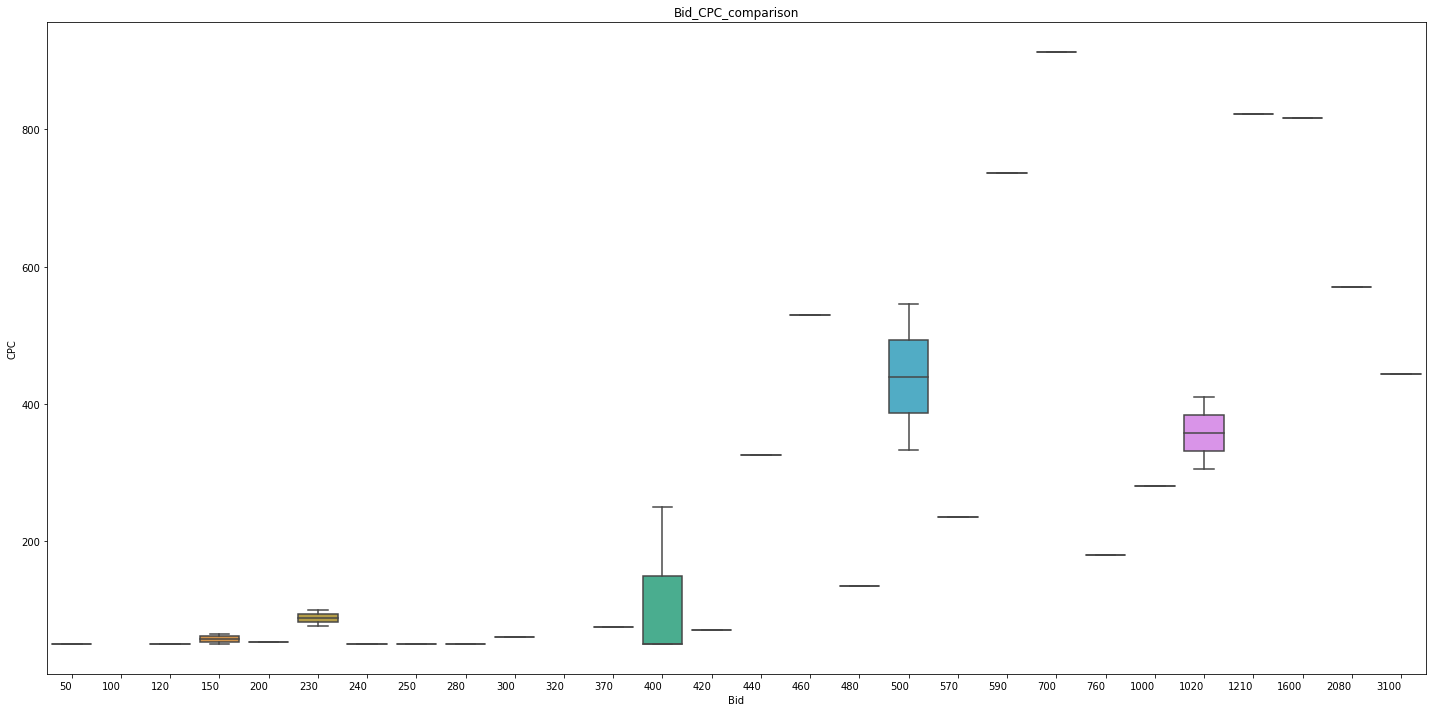

In [ ]:
ax = sns.boxplot(x="Bid", y="CPC", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Bid_CPC_comparison')

plt.tight_layout()
plt.show()

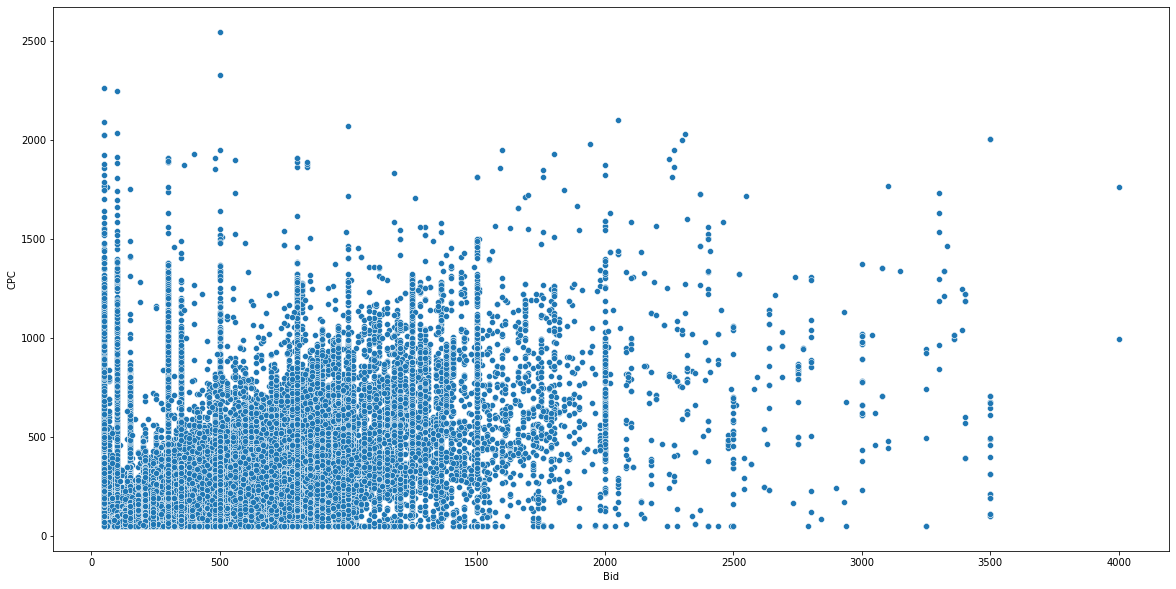

In [ ]:
sns.scatterplot(data=bidding_copy, x="Bid", y="CPC")

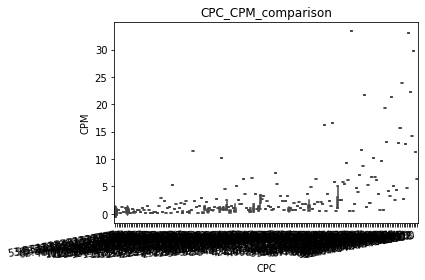

In [ ]:
ax = sns.boxplot(x="CPC", y="CPM", data=bidding.iloc[:1000,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
ax.set_title('CPC_CPM_comparison')

plt.tight_layout()
plt.show()

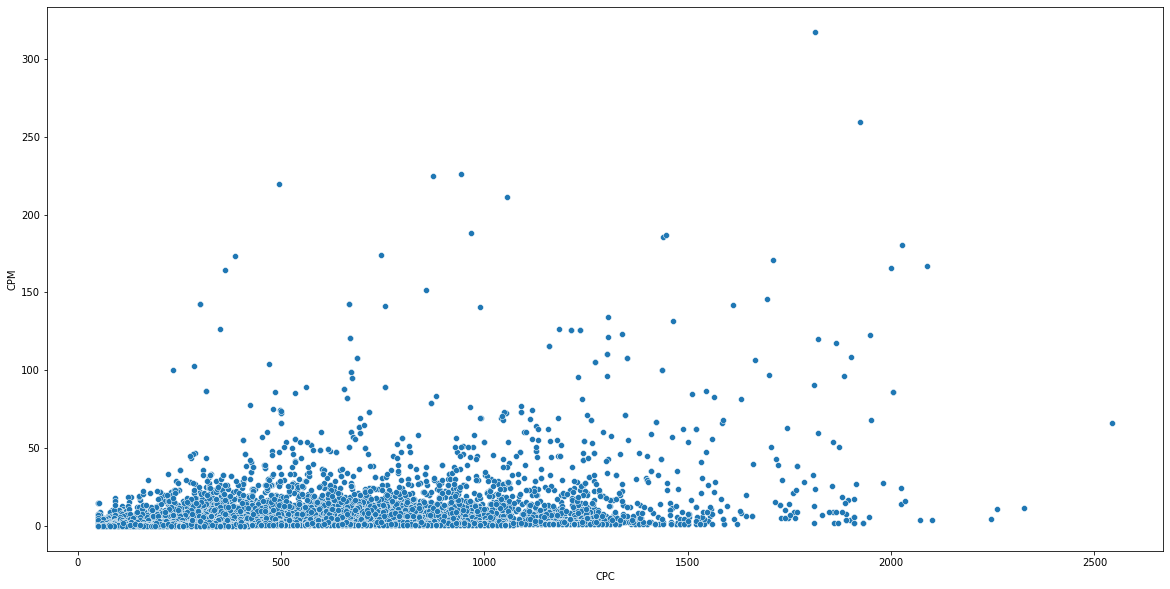

In [ ]:
sns.scatterplot(data=bidding_copy, x="CPC", y="CPM")

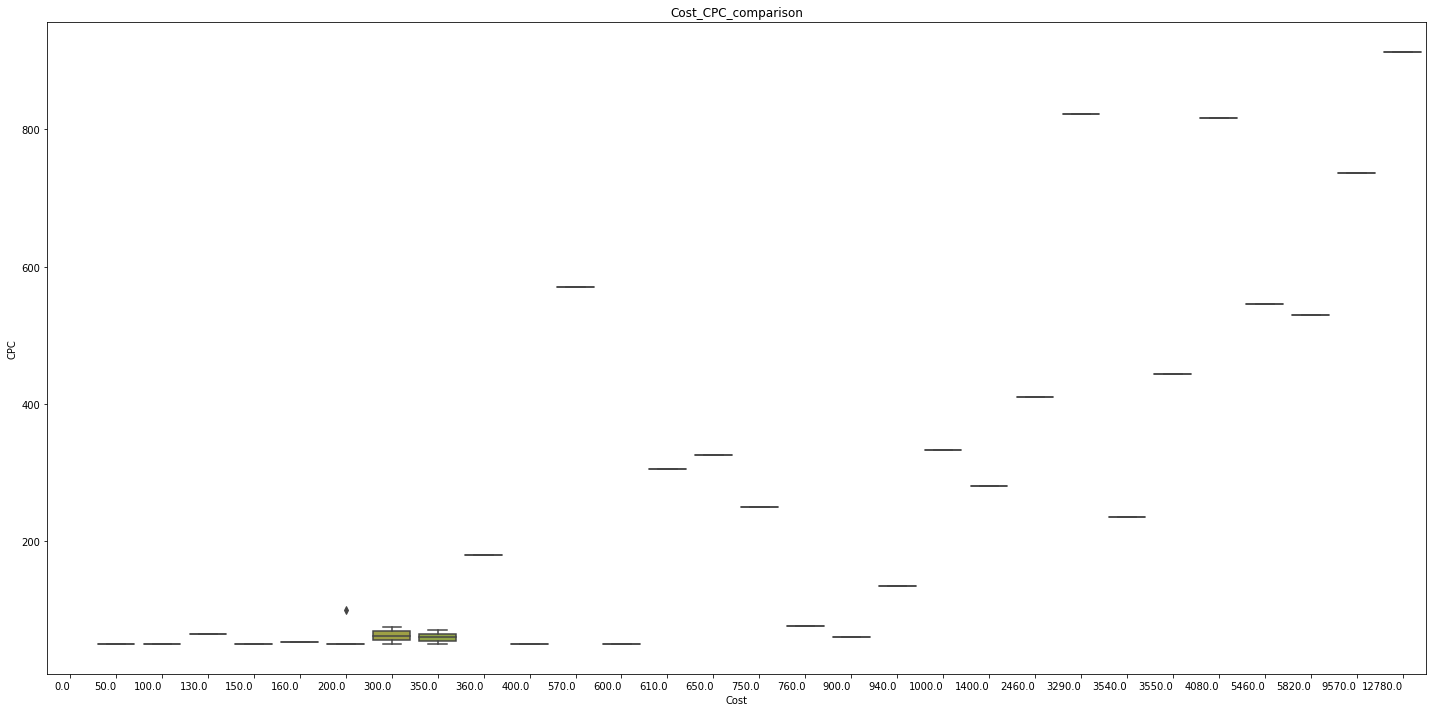

In [ ]:
ax = sns.boxplot(x="Cost", y="CPC", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Cost_CPC_comparison')

plt.tight_layout()
plt.show()

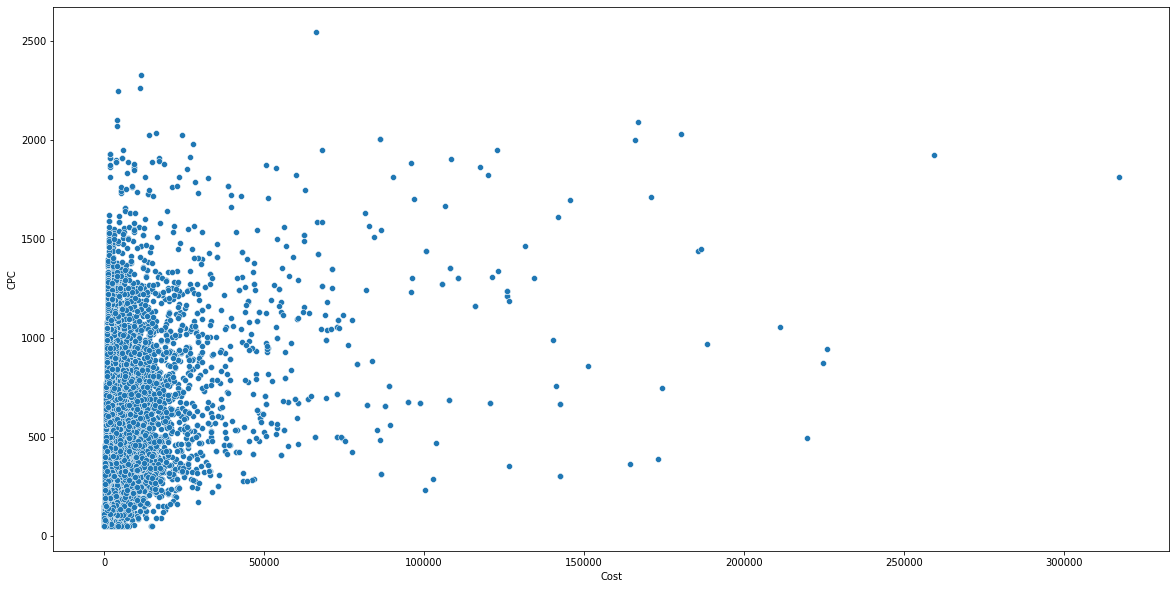

In [ ]:
sns.scatterplot(data=bidding_copy, x="Cost", y="CPC")

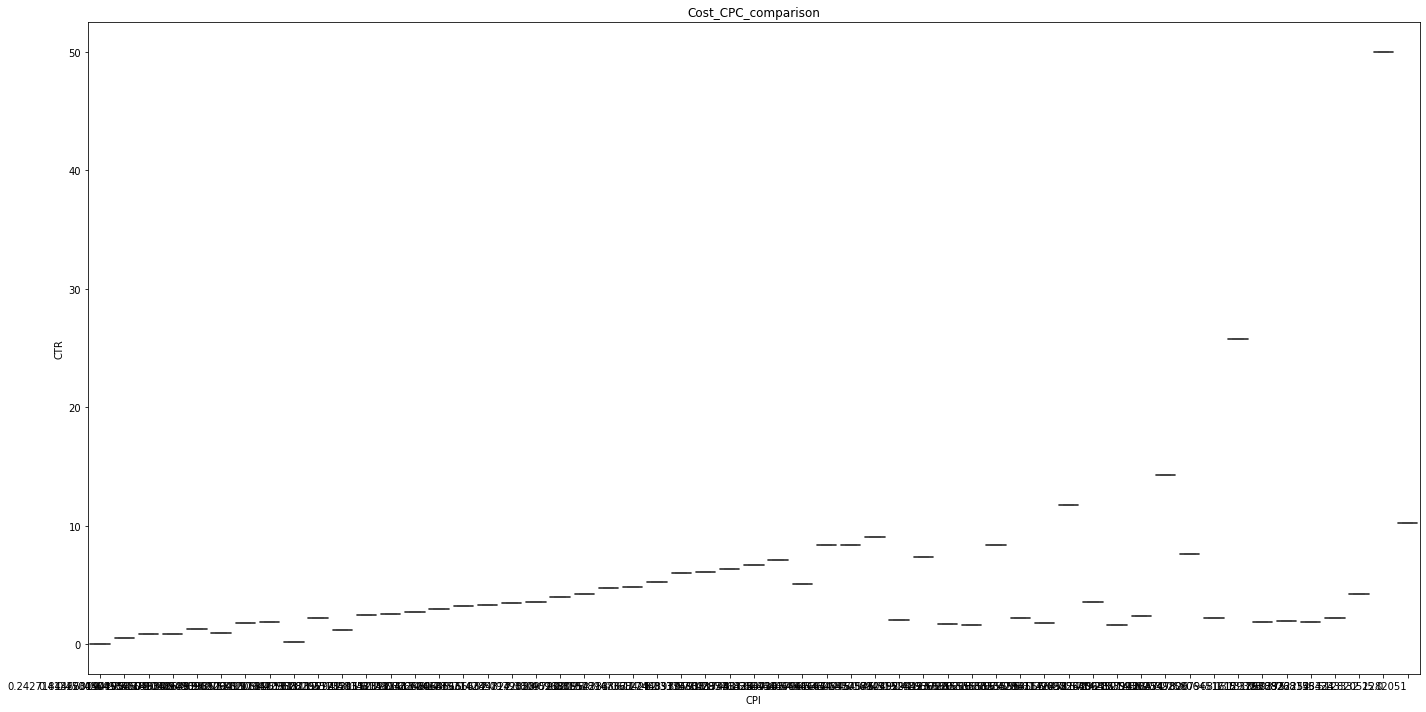

In [ ]:
ax = sns.boxplot(x="CPI", y="CTR", data=bidding.iloc[:100,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
ax.set_title('Cost_CPC_comparison')

plt.tight_layout()
plt.show()

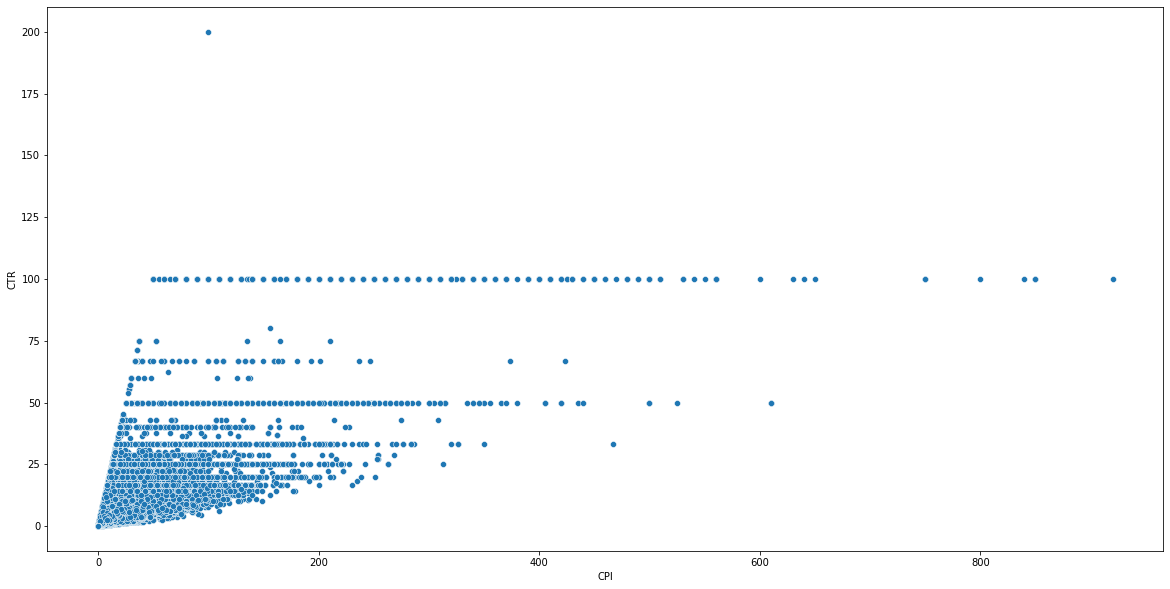

In [ ]:
sns.scatterplot(data=bidding_copy, x="CPI", y="CTR")

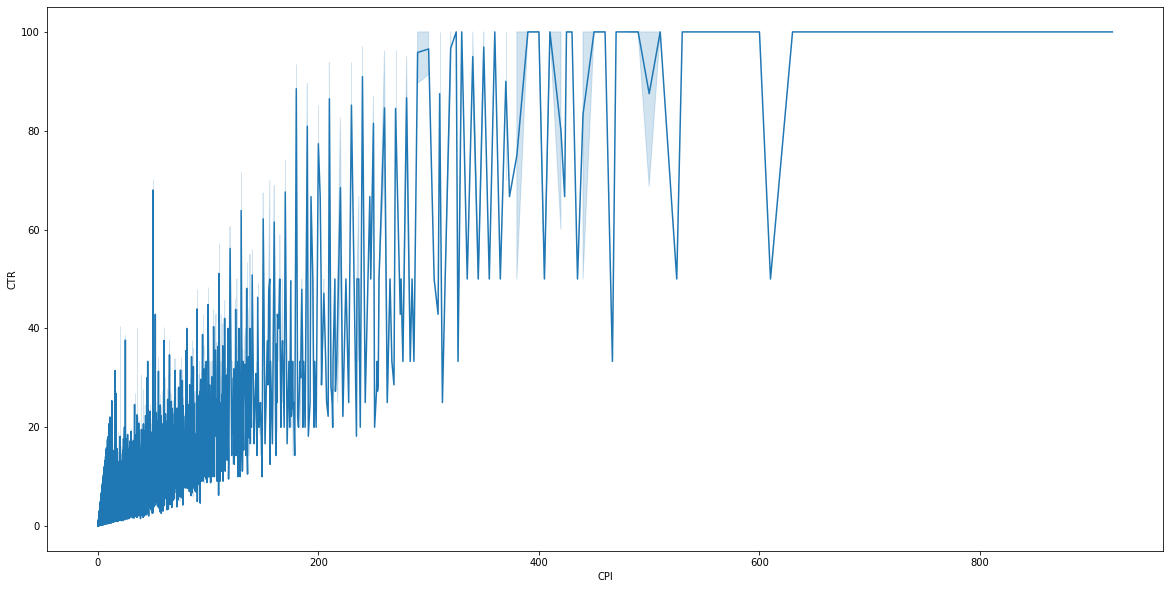

In [ ]:
sns.lineplot(data=bidding_copy, x="CPI", y="CTR")

In [ ]:
bidding.pivot(),.query(date="20221031")


In [ ]:
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


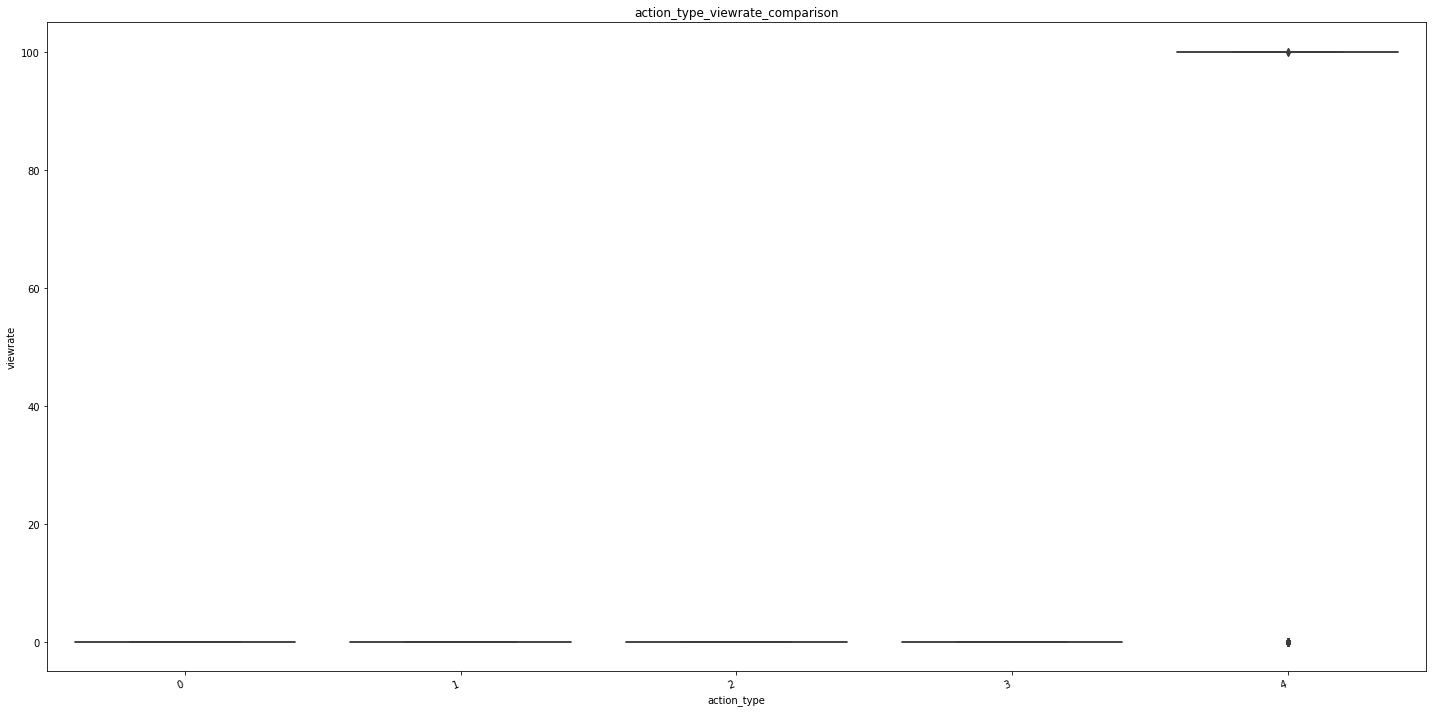

In [ ]:
ax = sns.boxplot(x="action_type", y="viewrate", data=log_copy.iloc[:1000,:])

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_title('action_type_viewrate_comparison')

plt.tight_layout()
plt.show()

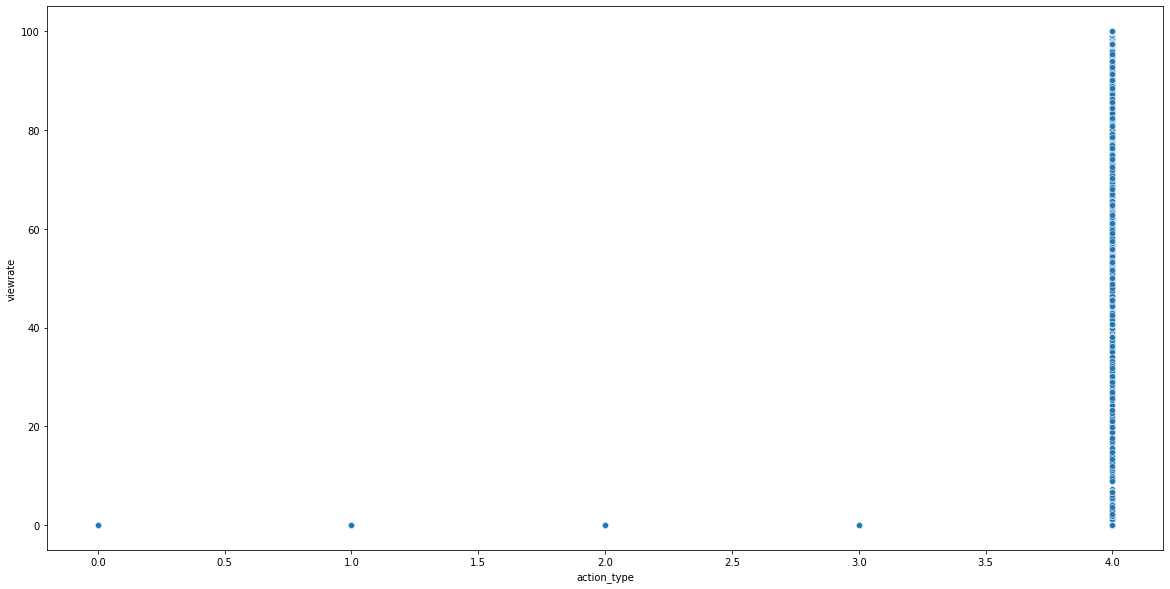

In [ ]:
sns.scatterplot(data=log_copy, x="action_type", y="viewrate")

In [ ]:
log.isnull().sum()

uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
log = log.dropna()

In [ ]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [ ]:
# 시각화 함수
def conutplot_funtion(var):
    print(var.groupby("action_type").size().sort_values(ascending=False))
    plt.figure(figsize=(10,10))
    sns.countplot(data=var.iloc[:,:], x="action_type", order = var["action_type"].value_counts().index)
    plt.show()

action_type
View         3749018
Highlight     352110
Basket        147160
Copy           90007
SINF           17912
dtype: int64


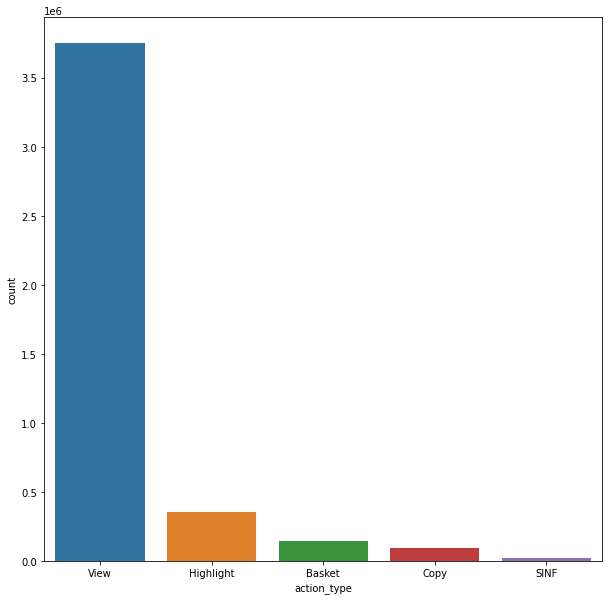

In [ ]:
conutplot_funtion(log)
4    3749018
2     352110
0     147160
1      90007
3      17912

pandas.core.series.Series

In [ ]:
# 시각화 함수
def conutplot_funtion(var):
    print(var.groupby("useragent_os").size().sort_values(ascending=False))
    plt.figure(figsize=(10,10))
    sns.countplot(data=var.iloc[:,:], x="useragent_os", order = var["useragent_os"].value_counts().index)
    plt.show()

useragent_os
Windows     2775801
Android      828055
iOS          488930
Mac OS X     263421
dtype: int64


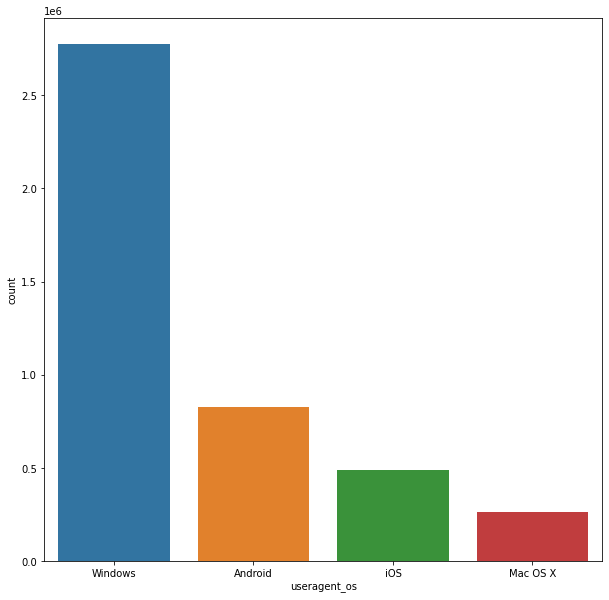

In [ ]:
conutplot_funtion(log)


In [ ]:
# 데이터 낮은값 제거 이유는 수치값이 나와서 클릭에 대한 비율이 낮기 때문에 광고데이터를 분석하는데 크게 기여도가 있지 않아서 나중에 오버피팅할 가능성이 높다. 
mask = log['useragent_os'].isin(['CentOS', "Chrome OS", "Fedora", "FreeBSD", "Linux", "Other", "Tizen", "Ubuntu"])
log = log[~mask]

In [ ]:
log = log.drop("RPT", axis=1)

In [ ]:
log["viewtime_hour"] = log["viewtime"].sort_values(ascending=False) * 1/1000 / 60 / 60 

In [ ]:
log = log.drop("viewtime", axis=1)

In [ ]:
log["viewtime_hour"]

0          0.022231
1          0.000000
2          0.000263
3          0.000000
4          0.000344
             ...   
5659536    0.003859
5659537    0.000000
5659538    0.013116
5659539    0.015008
5659540    0.000000
Name: viewtime_hour, Length: 4356207, dtype: float64

In [ ]:
# 라벨링값을 확실히 정해야 한다. 회사측에서 라벨링을 해야 하는지 문의드리기
# DL은 굳이 할 필요없다.
# 머신러닝 앙상블로 하는게 나을것이다.
# EDA랑 피처등 타겟을 정하고 하는게 가장 중요하다.

In [ ]:
def category_len(data):

    return len(data)

category_len()

930126

In [ ]:
bidding["CPI"]

0          0.000000
1          0.000000
2          0.000000
5          0.000000
10         0.000000
             ...   
1337081    0.000000
1337082    8.319328
1337083    0.000000
1337084    0.000000
1337087    0.000000
Name: CPI, Length: 930126, dtype: float64

In [ ]:
log["collect_time"].value_counts().sort_values(ascending=False).astype(int)

2022-12-23 10:18:19    48
2022-12-26 09:36:17    44
2022-12-26 11:30:20    42
2022-12-26 15:09:47    41
2022-12-28 15:15:12    40
                       ..
2022-12-22 08:17:38     1
2022-12-30 00:25:11     1
2022-12-26 04:45:30     1
2022-12-28 05:30:32     1
2022-12-29 08:14:39     1
Name: collect_time, Length: 680339, dtype: int64

In [ ]:
log_one_hot = log.replace("view", "")

In [ ]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356207 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   uid              object 
 1   action_type      object 
 2   category1        object 
 3   category2        object 
 4   category3        object 
 5   collect_time     object 
 6   geoip_city_name  object 
 7   useragent_os     object 
 8   viewrate         float64
 9   RPT              float64
 10  viewtime_hour    float64
dtypes: float64(3), object(8)
memory usage: 398.8+ MB


In [ ]:
# Number of unique classes in each object column
log.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

uid                662670
action_type             5
category1            2655
category2             548
category3            1683
collect_time       680550
geoip_city_name      2262
useragent_os           12
dtype: int64

In [ ]:
bidding_copy = bidding.copy()

In [ ]:
log_copy = log.copy()

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in log_copy:
    if log_copy[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(log_copy[col].unique())) >= 2:
            # Train on the training data
            le.fit(log_copy[col])
            # Transform both training and testing data
            log_copy[col] = le.transform(log_copy[col])
            # app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

8 columns were label encoded.


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in bidding_copy:
    if bidding_copy[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(bidding_copy[col].unique())) >= 2:
            # Train on the training data
            le.fit(bidding_copy[col])
            # Transform both training and testing data
            bidding_copy[col] = le.transform(bidding_copy[col])
            # app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [ ]:
bidding_copy

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date,CTR,CPC,CPM,CPI
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,0,47,140,147,20221031,0.000000,NaN,0.00,0.000000
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,0,37,98,409,20221031,0.000000,NaN,0.00,0.000000
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,0,2,79,670,20221031,0.000000,NaN,0.00,0.000000
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,0,47,163,349,20221031,0.000000,NaN,0.00,0.000000
10,4159623,9,0,0.0,1.000000,50,559000,559000,-1,0,47,163,595,20221031,0.000000,NaN,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,2,10,30,118,20230103,0.000000,NaN,0.00,0.000000
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,2,10,30,609,20230103,2.521008,330.0,0.99,8.319328
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,0,37,98,409,20230103,0.000000,NaN,0.00,0.000000
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,2,10,129,136,20230103,0.000000,NaN,0.00,0.000000


In [ ]:
log_copy

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime_hour
0,369808,4,2072,358,1167,613369,1768,2,100.0,0.022231
1,228,0,2351,377,1389,597042,2217,2,0.0,0.000000
2,601761,4,2351,512,1204,612317,1770,3,100.0,0.000263
3,437688,2,570,530,1664,614897,719,2,0.0,0.000000
4,40263,4,287,489,1433,617911,953,1,100.0,0.000344
...,...,...,...,...,...,...,...,...,...,...
5659536,325835,4,2072,503,1431,543059,1770,0,100.0,0.003859
5659537,328855,0,287,489,1433,523259,948,2,0.0,0.000000
5659538,458184,4,287,523,1163,596358,704,0,100.0,0.013116
5659539,476048,4,309,342,1357,511106,1770,0,100.0,0.015008


In [ ]:
log_copy["viewrate"].value_counts()

100.00    3386223
0.00       950870
99.91        5743
99.90        2667
99.93        1665
           ...   
63.80           1
94.51           1
92.81           1
82.25           1
2.25            1
Name: viewrate, Length: 1635, dtype: int64

In [ ]:
bidding_date = bidding["date"].astype("object")

# [20221031 20221101 20221102 20221103 20221104 20221105 20221106 20221107
#  20221108 20221109 20221110 20221111 20221112 20221113 20221114 20221115
#  20221116 20221117 20221118 20221119 20221120 20221121 20221122 20221123
#  20221124 20221125 20221126 20221127 20221128 20221129 20221130 20221202
#  20221203 20221204 20221205 20221208 20221209 20221210 20221211 20221212
#  20221213 20221214 20221215 20221216 20221217 20221218 20221219 20221225
#  20221226 20221227 20221228 20221229 20221230 20221231 20230101 20230102
#  20230103]
type(bidding_date)

pandas.core.series.Series

In [ ]:
bidding_copy['datetime'] = bidding_copy['date'].apply(lambda x: pd.to_datetime(str(x),format="%Y-%m-%d"))

In [ ]:
bidding_copy

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date,CTR,CPC,CPM,CPI,datetime
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,0,47,140,147,20221031,0.000000,NaN,0.00,0.000000,2022-10-31
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,0,37,98,409,20221031,0.000000,NaN,0.00,0.000000,2022-10-31
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,0,2,79,670,20221031,0.000000,NaN,0.00,0.000000,2022-10-31
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,0,47,163,349,20221031,0.000000,NaN,0.00,0.000000,2022-10-31
10,4159623,9,0,0.0,1.000000,50,559000,559000,-1,0,47,163,595,20221031,0.000000,NaN,0.00,0.000000,2022-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,2,10,30,118,20230103,0.000000,NaN,0.00,0.000000,2023-01-03
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,2,10,30,609,20230103,2.521008,330.0,0.99,8.319328,2023-01-03
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,0,37,98,409,20230103,0.000000,NaN,0.00,0.000000,2023-01-03
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,2,10,129,136,20230103,0.000000,NaN,0.00,0.000000,2023-01-03


In [ ]:
bidding_copy["year"] = bidding_copy["datetime"].dt.year
bidding_copy["month"] = bidding_copy["datetime"].dt.month
bidding_copy["day"] = bidding_copy["datetime"].dt.day

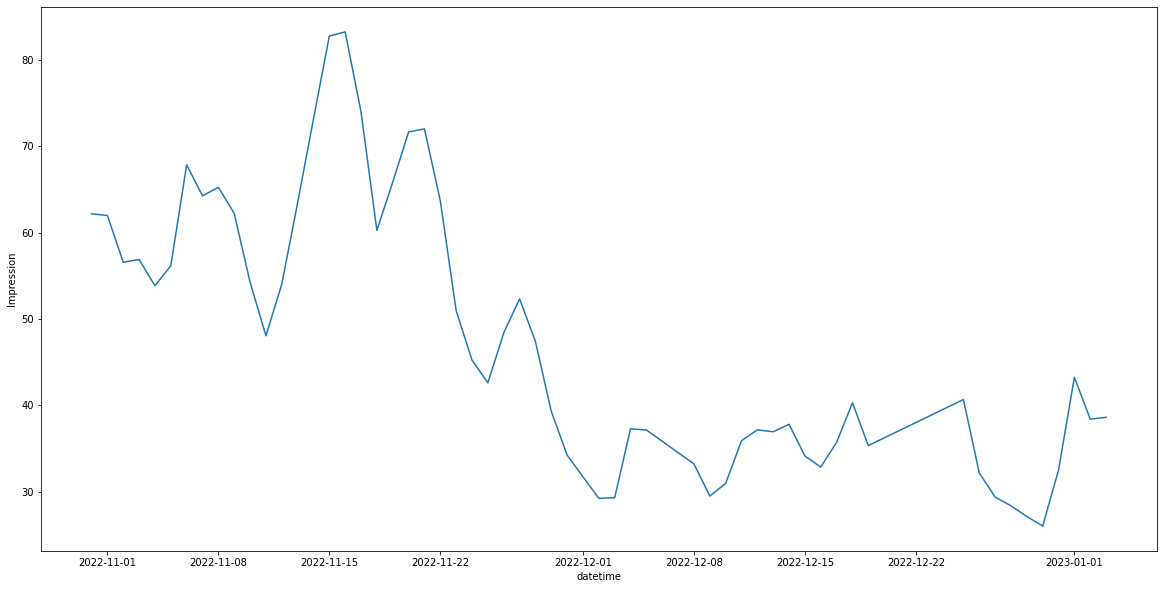

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Impression", ci = None)

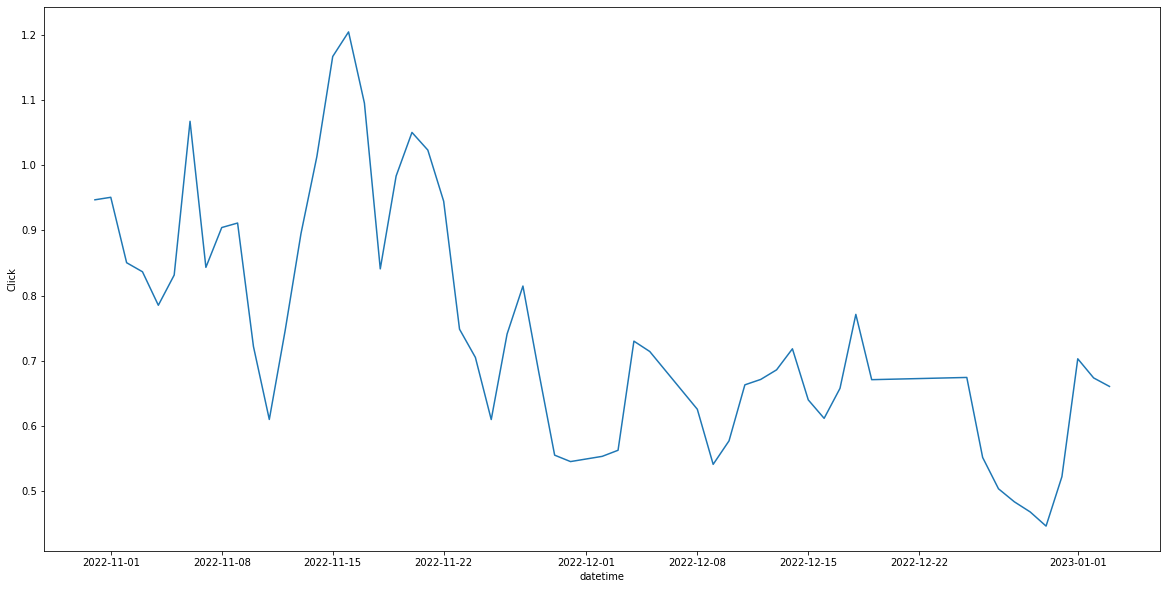

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Click", ci = None)

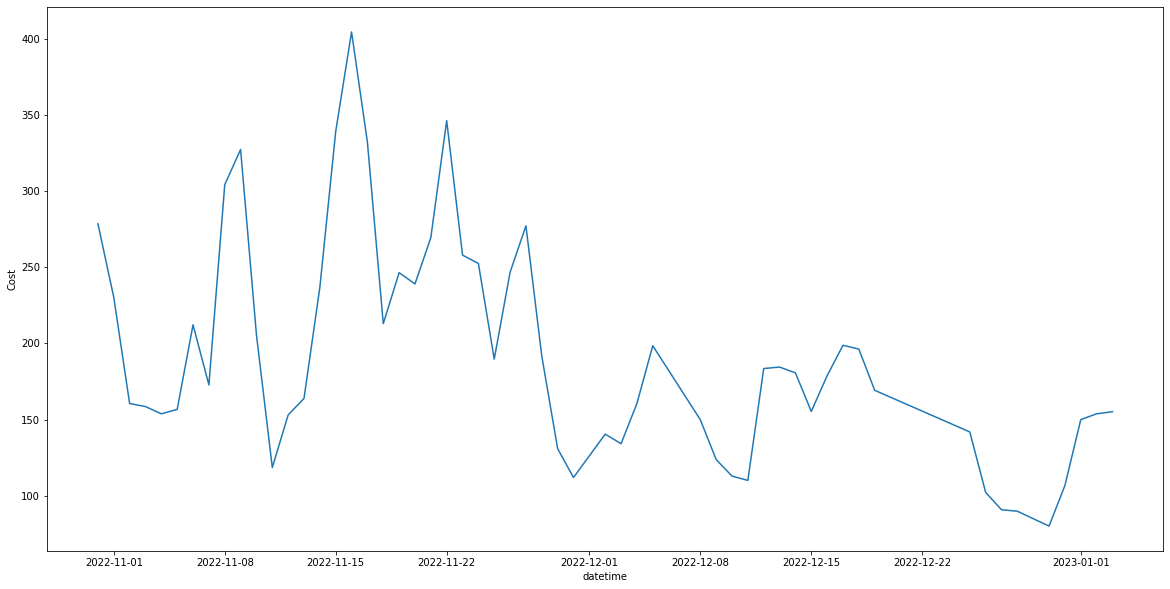

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Cost", ci=None)

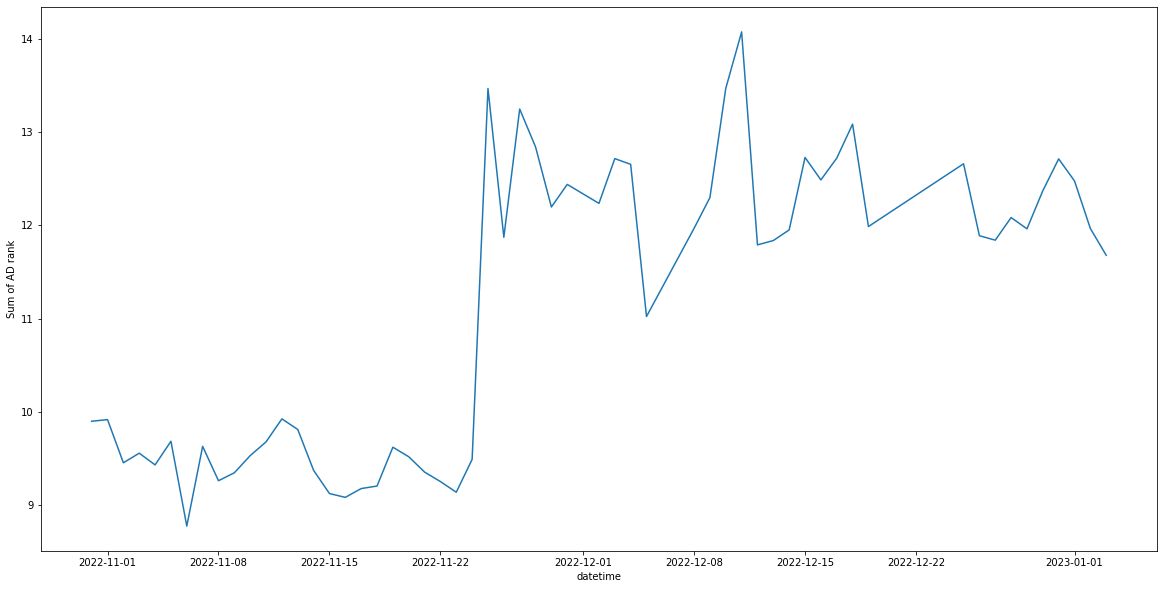

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Sum of AD rank", ci=None)

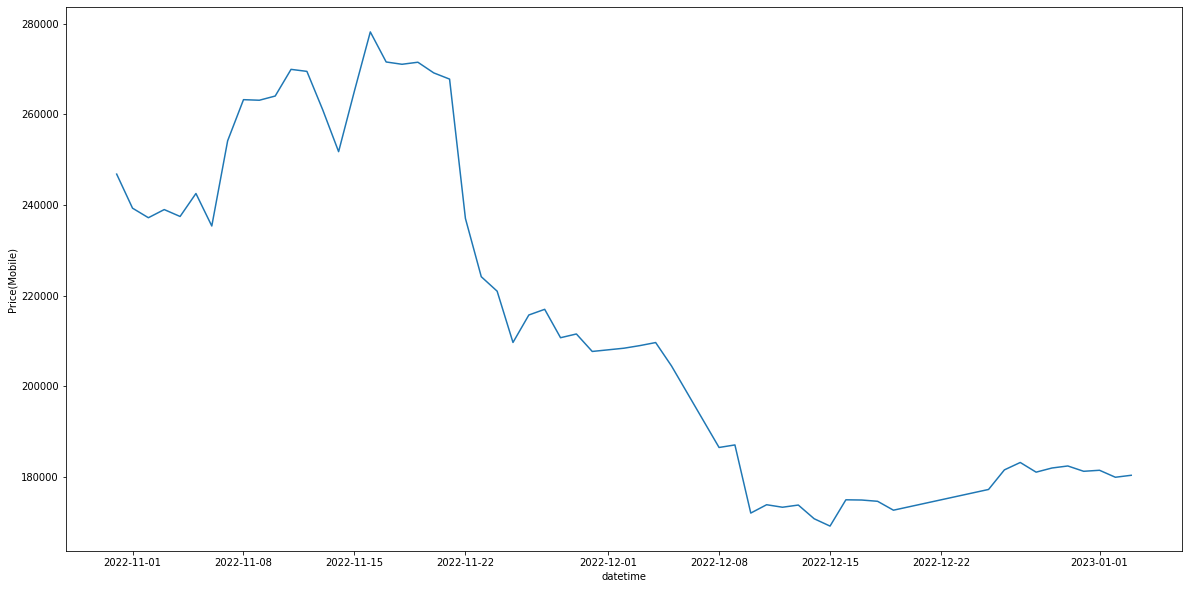

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Price(Mobile)", ci=None)

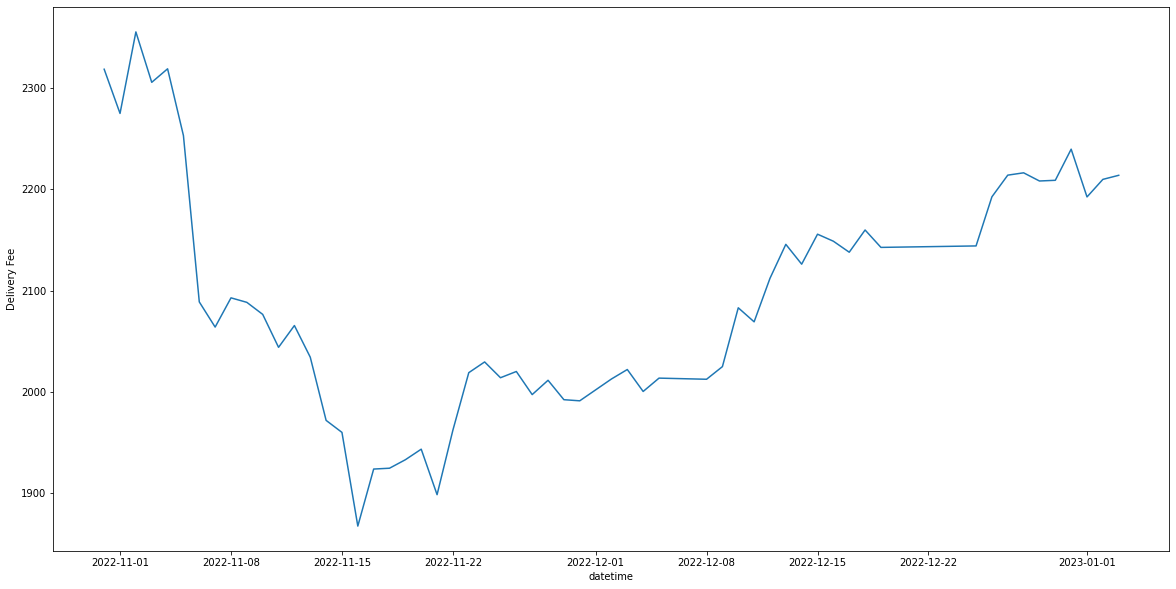

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Delivery Fee", ci=None)

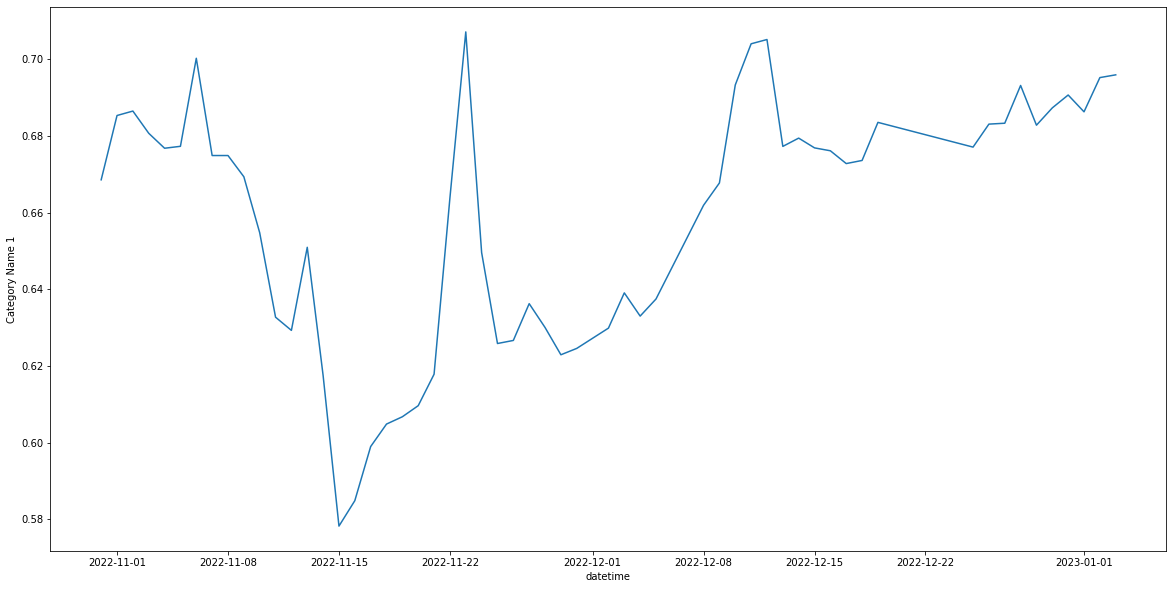

In [ ]:

sns.lineplot(data=bidding_copy, x="datetime", y="Category Name 1", ci=None)

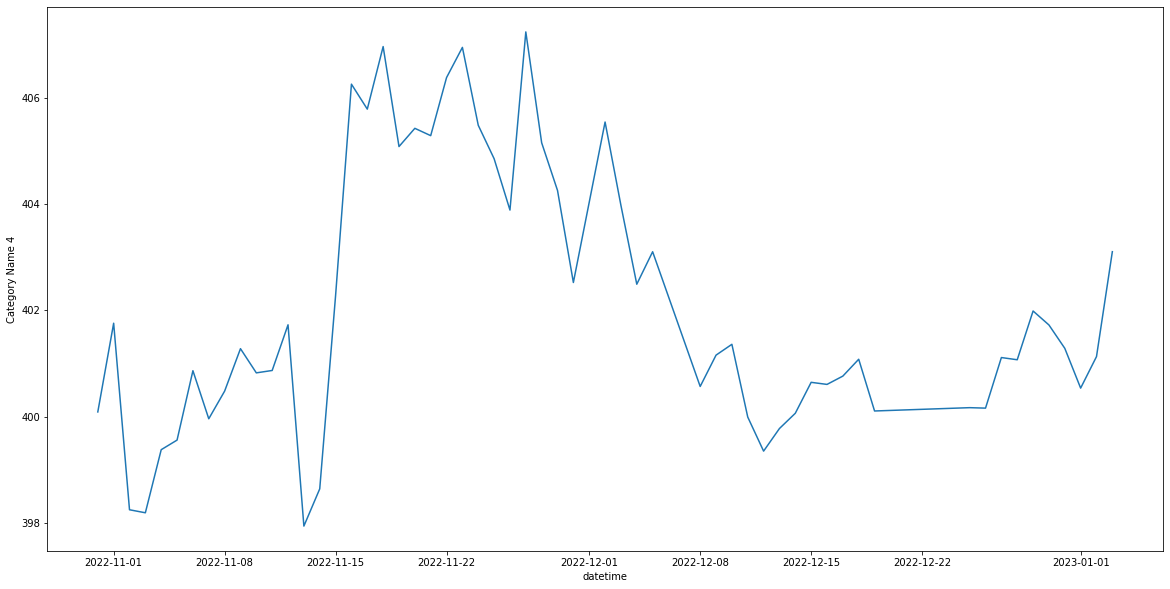

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="Category Name 4", ci=None)

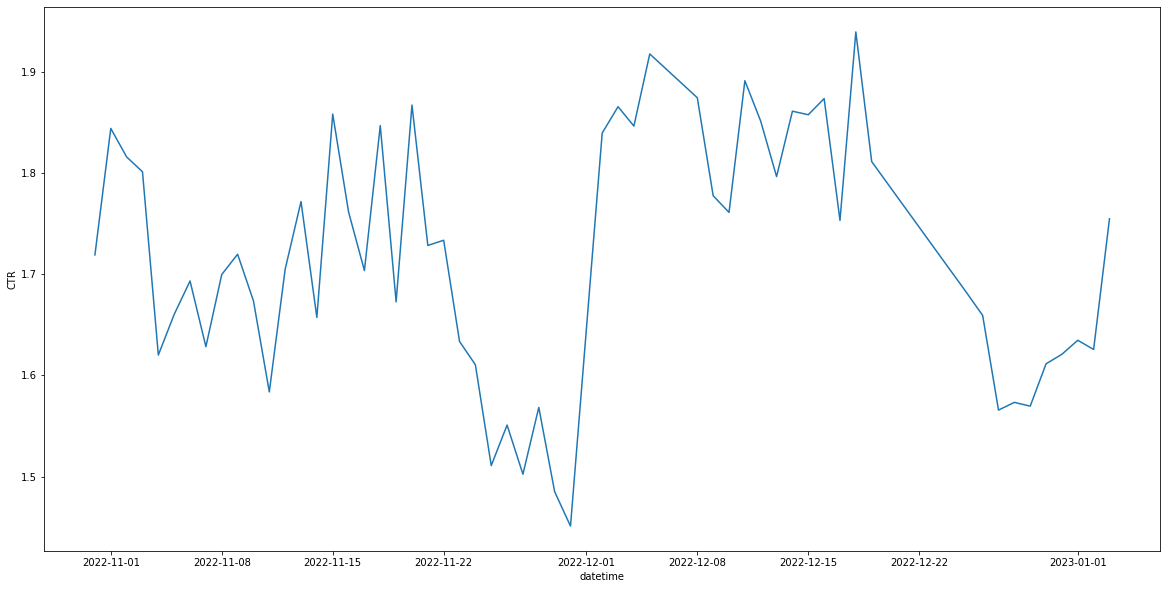

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="CTR", ci=None)

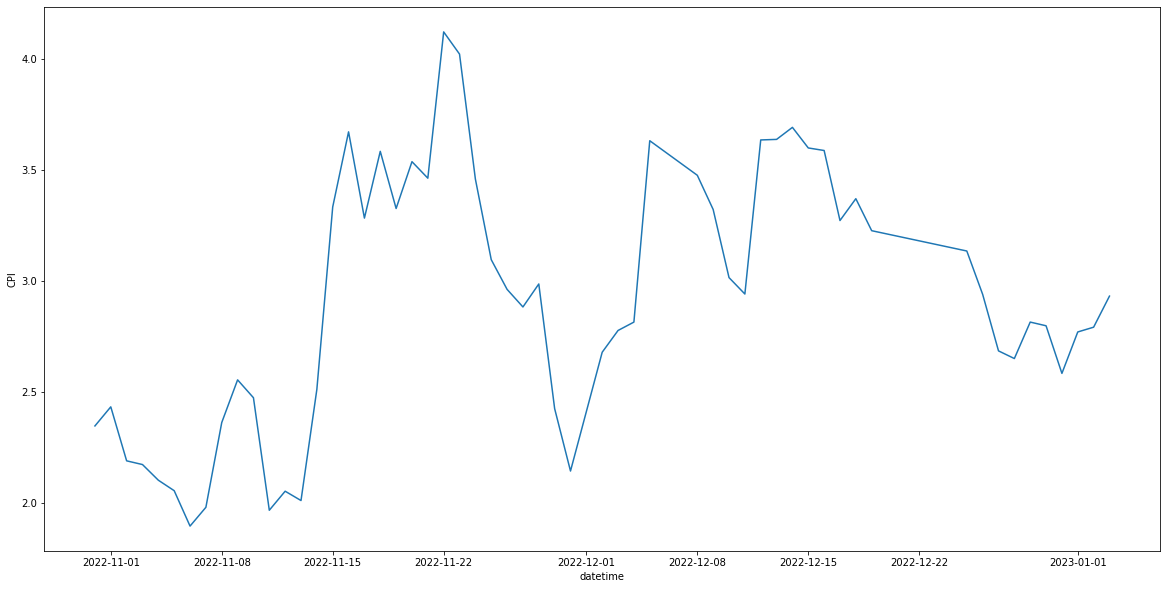

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="CPI", ci=None)

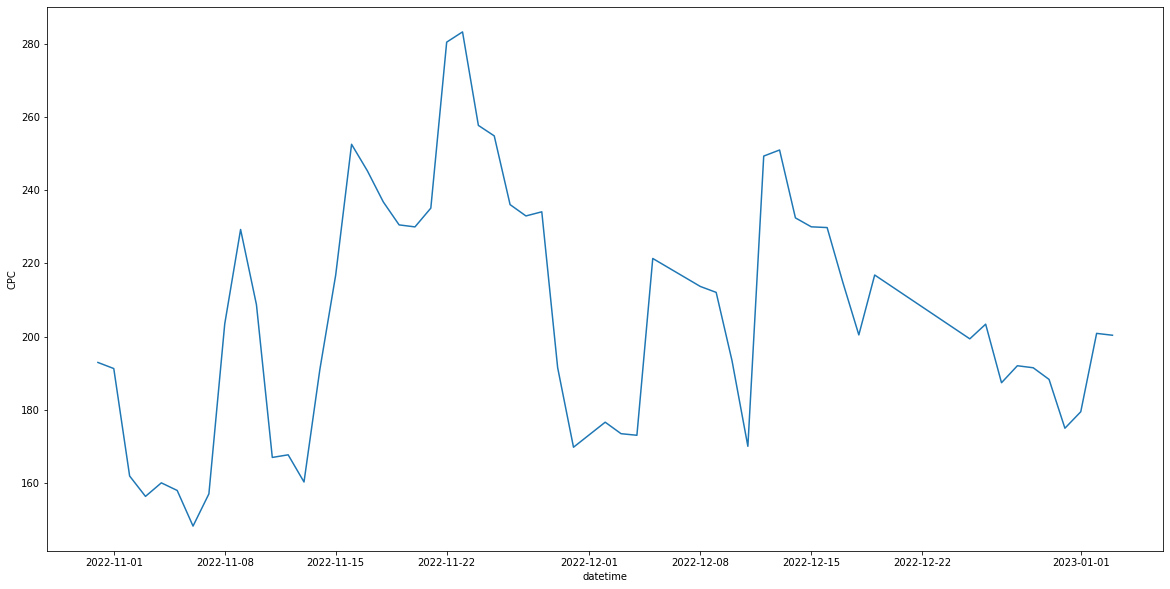

In [ ]:
sns.lineplot(data=bidding_copy, x="datetime", y="CPC", ci=None)

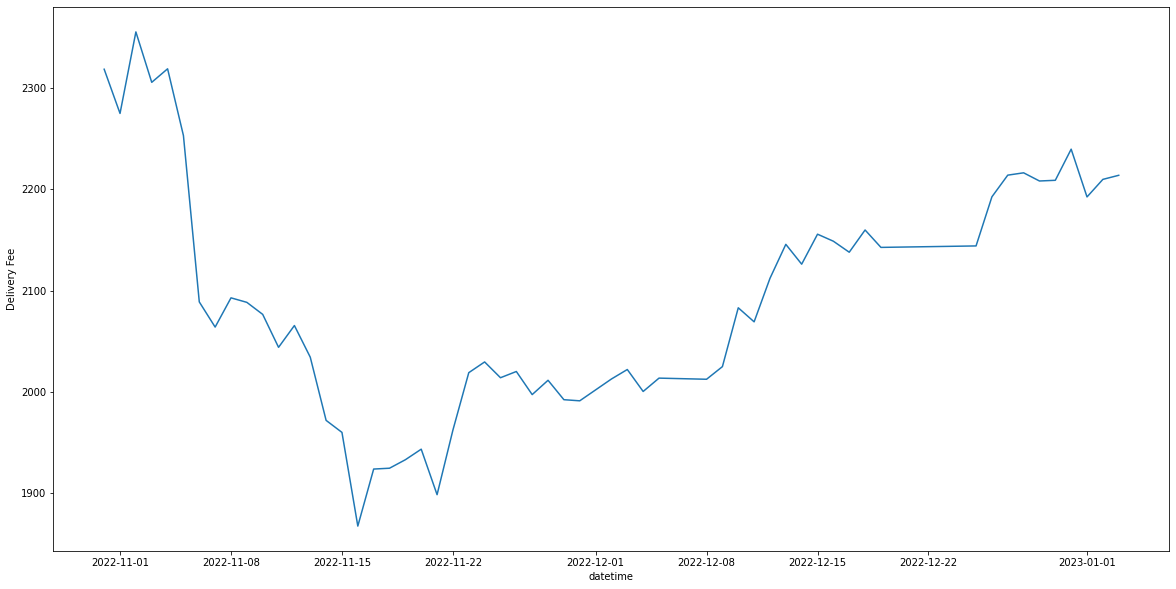

In [ ]:

sns.lineplot(data=bidding_copy, x="datetime", y="Delivery Fee", ci=None)

# 데이터 분석 끝

In [ ]:
bidding['Category Name 4'].index(267083)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date,CTR,CPC,CPM,CPI
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031,0.000000,NaN,0.00,0.000000
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031,0.000000,NaN,0.00,0.000000
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031,0.000000,NaN,0.00,0.000000
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031,0.000000,NaN,0.00,0.000000
10,4159623,9,0,0.0,1.000000,50,559000,559000,-1,가구/인테리어,침실가구,침대,침대프레임,20221031,0.000000,NaN,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,5959462,10,0,0.0,15.900000,200,199000,199000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031,0.000000,NaN,0.00,0.000000
159,5959498,42,2,100.0,1.857143,50,611800,611800,-1,가구/인테리어,거실가구,소파,리클라이너소파,20221031,4.761905,50.0,0.10,2.380952
160,5959499,5,0,0.0,6.800000,50,233000,233000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031,0.000000,NaN,0.00,0.000000
161,5959519,256,5,4080.0,8.867188,1600,660900,660900,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031,1.953125,816.0,4.08,15.937500


In [ ]:
np.where(404 == bidding_copy["Category Name 4"])

(array([317076, 329179, 340871, 353904, 368557, 383836, 398938, 414623,
        430638, 446425, 462042, 477108, 492328, 508081, 524219, 542157,
        559674, 577179, 595277, 613666, 632479, 651381, 670082, 688431,
        707099, 726163, 745415, 764689, 784313, 803889, 823298, 842403,
        861098, 880092, 899549, 919364]),)

In [ ]:
bidding[bidding["index"] <= 317076 ]

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date,CTR,CPC,CPM,CPI
570,79732,21,0,0.0,8.238095,50,75800,75800,0,가구/인테리어,인테리어소품,시계,벽시계,20221031,0.000000,NaN,0.00,0.000000
571,88311,2,0,0.0,18.000000,50,85900,85900,-1,가구/인테리어,침실가구,장롱/붙박이장,틈새옷장,20221031,0.000000,NaN,0.00,0.000000
581,110757,70,1,50.0,5.071429,50,17800,17800,2500,생활/건강,공구,전기용품,멀티탭,20221031,1.428571,50.0,0.05,0.714286
582,110780,29,1,50.0,4.551724,80,44900,44900,15000,가구/인테리어,침실가구,거울,전신거울,20221031,3.448276,50.0,0.05,1.724138
583,110785,64,1,230.0,4.531250,350,33900,33900,12000,가구/인테리어,침실가구,거울,전신거울,20221031,1.562500,230.0,0.23,3.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335713,226248,17,0,0.0,2.352941,300,15900,15900,2500,생활/건강,주방용품,잔/컵,유리컵,20230103,0.000000,NaN,0.00,0.000000
1335714,226249,134,4,1080.0,3.208955,390,18700,18700,2500,생활/건강,주방용품,잔/컵,머그,20230103,2.985075,270.0,1.08,8.059701
1335715,226251,17,0,0.0,18.588235,500,13800,13800,3000,생활/건강,주방용품,잔/컵,샴페인잔,20230103,0.000000,NaN,0.00,0.000000
1335716,226253,35,0,0.0,7.771429,500,13800,13800,3000,생활/건강,주방용품,잔/컵,와인잔,20230103,0.000000,NaN,0.00,0.000000


In [ ]:
log_copy

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime_hour
0,369808,4,2072,358,1167,613369,1768,2,100.0,0.022231
1,228,0,2351,377,1389,597042,2217,2,0.0,0.000000
2,601761,4,2351,512,1204,612317,1770,3,100.0,0.000263
3,437688,2,570,530,1664,614897,719,2,0.0,0.000000
4,40263,4,287,489,1433,617911,953,1,100.0,0.000344
...,...,...,...,...,...,...,...,...,...,...
5659536,325835,4,2072,503,1431,543059,1770,0,100.0,0.003859
5659537,328855,0,287,489,1433,523259,948,2,0.0,0.000000
5659538,458184,4,287,523,1163,596358,704,0,100.0,0.013116
5659539,476048,4,309,342,1357,511106,1770,0,100.0,0.015008


In [ ]:
sns.set()
sns.pairplot(log_copy, size = 2.5)
plt.show()

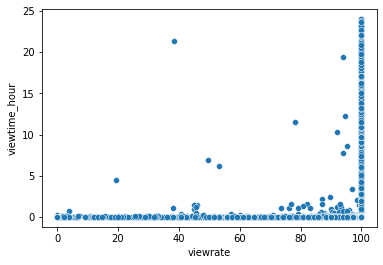

In [ ]:

sns.scatterplot(data=log_copy, y="viewtime_hour", x="viewrate", ci=None)

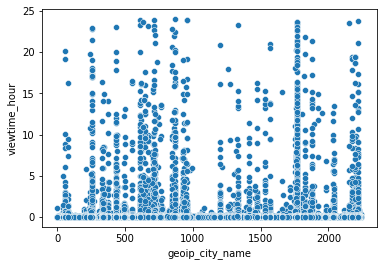

In [ ]:
sns.scatterplot(data=log_copy, y="viewtime_hour", x="geoip_city_name", ci=None)

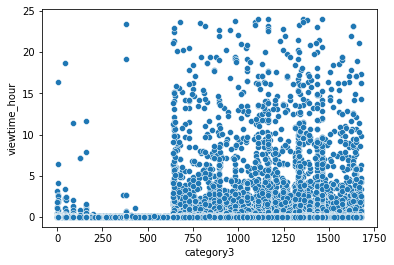

In [ ]:
sns.scatterplot(data=log_copy, y="viewtime_hour", x="category3", ci=None)

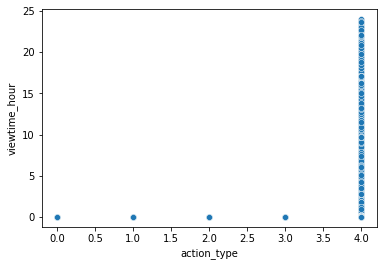

In [ ]:
sns.scatterplot(data=log_copy, y="viewtime_hour", x="action_type", ci=None)

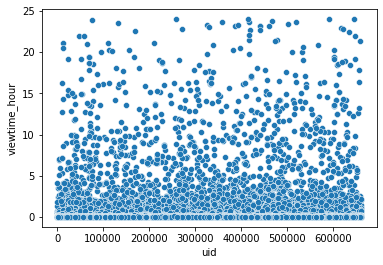

In [ ]:
sns.scatterplot(data=log_copy, y="viewtime_hour", x="uid", ci=None)

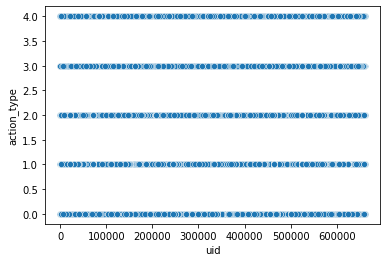

In [ ]:
sns.scatterplot(data=log_copy, y="action_type", x="uid", ci=None)

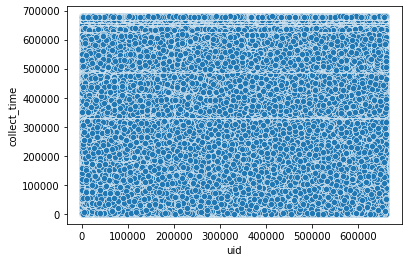

In [ ]:

sns.scatterplot(data=log_copy, y="collect_time", x="uid", ci=None)

In [ ]:
# subplots 
fig, ax = plt.subplots(2,4,figsize=(20,10))
sns.countplot(log_copy.uid, ax=ax[0,0], palette='Greens_r')
sns.countplot(log_copy.action_type, ax=ax[0,1], palette='Reds_r')
sns.countplot(log_copy.category1, ax=ax[0,2], palette='Blues_r')
sns.countplot(log_copy.useragent_os, ax=ax[0,3], palette='Purples_r')
sns.countplot(log_copy.viewrate, ax=ax[1,0], palette='Purples_r')
sns.countplot(log_copy.viewtime_hour, ax=ax[1,1], palette='Purples_r')
sns.countplot(log_copy.geo_city_name, ax=ax[1,2], palette='Purples_r')